# LogNormal 2 Eval
- LogNormal 2 (ln2) from __Global Best__ LogNormal 1 (ln1)
- LogNormal 2 (ln2) from __Global Median__ LogNormal 1 (ln1)
- LogNormal 2 (ln2) from __Random Init__
 

In [1]:
import pandas as pd
import numpy as np

import os 
# # This is for only if you have multiple GPUs
# # If you have multiple GPUs, then pick ONE for this code.
# os.environ["CUDA_VISIBLE_DEVICES"]= "0" 
import tensorflow as tf

np.random.seed(1004)
tf.random.set_seed(1004)

/tmp/ipykernel_801634/2668161022.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
2024-05-13 18:40:49.086524: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-13 18:40:49.123134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-13 18:

In [2]:
import sys
import importlib
sys.path.append('../')

import model, evaluations, data, utils, data_hp
importlib.reload(model)
importlib.reload(evaluations)
importlib.reload(data)
importlib.reload(utils)
importlib.reload(data_hp)

<module 'data_hp' from '/home/ylee/WirelessSensor2024/DataAnalysis/../data_hp.py'>

In [3]:
dir_main = '../saved_models'
max_iterations = 10
data_size_test = data_hp.data_size_test

# LogNormal 2 Test Data

In [4]:
dict_ln2 = data_hp.dict_ln2

con_ln2 = data.LogNormal(
        eta=dict_ln2["eta"],
        Pt=dict_ln2["Pt"],
        alpha_1=dict_ln2["alpha_1"],
        alpha_2=dict_ln2["alpha_2"],
        delta_1=dict_ln2["delta_1"],
        delta_2=dict_ln2["delta_2"],
        d_0=dict_ln2["d_0"],
        d_c=dict_ln2["d_c"],
        d_array=dict_ln2["d_array"],
    ) 

test_ln2_data, test_ln2_indices = con_ln2.generate(data_size_test)
df_ln2_test_back_scaled = pd.DataFrame(np.hstack((test_ln2_data, test_ln2_indices,)), columns=['genuine', 'd'])

# LogNormal2 from __Global Best__ LogNormal 1 

In [5]:
name_dir_ln1_ln2 = "LogNormal1_LogNormal2_best"
dir_sub_ln1_ln2 = "LogNormal2"
name_model_ln1_ln2 = "LogNormal"
dir_ln1_ln2 = f"{dir_main}/{name_dir_ln1_ln2}"

list_dir_csv_ln1_ln2 = list()
for ep in range(max_iterations):
    list_dir_csv_ln1_ln2.append(f"{dir_ln1_ln2}/{ep}/{dir_sub_ln1_ln2}/log.csv")

list_dir_csv_ln1_ln2

['../saved_models/LogNormal1_LogNormal2_best/0/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/1/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/2/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/3/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/4/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/5/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/6/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/7/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/8/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_best/9/LogNormal2/log.csv']

In [6]:
list_csv_ln1_ln2 = list()
for version, local_dir in enumerate(list_dir_csv_ln1_ln2):
    local_df_ln1_ln2 = pd.read_csv(local_dir)
    local_df_ln1_ln2['version'] = version
    list_csv_ln1_ln2.append(local_df_ln1_ln2)

list_csv_ln1_ln2

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  0.079153 -0.881411  0.174360  0.070542        0
 1       2  0.934134  0.427013  0.066629  0.041438        0
 2       3  1.442461 -0.796409  0.107350  0.072543        0
 3       4  0.240782 -1.175699  0.380463  0.089979        0
 4       5 -0.421851 -0.583474  0.228495  0.047175        0
 5       6 -0.499044 -1.449148  0.212283  0.164485        0
 6       7 -1.481093 -1.876799  0.473708  0.163939        0
 7       8 -1.553346 -1.883219  0.487674  0.156516        0
 8       9 -1.607329 -2.102522  0.619536  0.228537        0
 9      10 -1.810979 -2.101904  0.647892  0.207923        0
 10     11 -2.104873 -2.116933  0.755914  0.172377        0
 11     12 -2.063266 -1.988061  0.669726  0.141635        0
 12     13 -2.091027 -2.109457  0.751951  0.190731        0
 13     14 -2.096060 -2.103788  0.798471  0.169878        0
 14     15 -2.080494 -2.124685  0.877881  0.102084        0,
     epoch      loss  val_loss    avg_o

In [7]:
df_whole_ln1_ln2 = pd.concat(list_csv_ln1_ln2, axis=0).reset_index(drop=True)
df_whole_ln1_ln2['metric'] = df_whole_ln1_ln2['avg_oa'] - 2 * df_whole_ln1_ln2['std']
df_whole_ln1_ln2

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  0.079153 -0.881411  0.174360  0.070542        0  0.033275
1        2  0.934134  0.427013  0.066629  0.041438        0 -0.016247
2        3  1.442461 -0.796409  0.107350  0.072543        0 -0.037735
3        4  0.240782 -1.175699  0.380463  0.089979        0  0.200504
4        5 -0.421851 -0.583474  0.228495  0.047175        0  0.134146
..     ...       ...       ...       ...       ...      ...       ...
145     11 -2.116141 -1.954165  0.783370  0.042886        9  0.697597
146     12 -2.068243 -2.109658  0.923720  0.026364        9  0.870993
147     13 -2.111099 -2.110458  0.908097  0.031289        9  0.845519
148     14 -2.113309 -2.129289  0.957716  0.013844        9  0.930028
149     15 -2.109041 -2.095783  0.904392  0.031731        9  0.840931

[150 rows x 7 columns]

In [8]:
df_whole_ln1_ln2[df_whole_ln1_ln2['loss'].isna()]['version'].unique()

array([], dtype=int64)

In [9]:
df_whole_ln1_ln2.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      0.409021  0.152784  0.131722  0.056853      4.5  0.018016
2     -0.138942  0.304098  0.212249  0.051682      4.5  0.108886
3      0.014445  0.044113  0.208883  0.050268      4.5  0.108347
4     -0.197665 -0.676812  0.390739  0.066945      4.5  0.256848
5     -0.332507 -0.786176  0.377234  0.051483      4.5  0.274268
6     -0.432648 -1.325421  0.485274  0.095423      4.5  0.294428
7     -0.920249 -0.511949  0.413309  0.079097      4.5  0.255114
8     -1.311353 -1.739508  0.631100  0.082972      4.5  0.465156
9     -1.539870 -1.821718  0.680275  0.075248      4.5  0.529780
10    -1.905245 -2.076778  0.830726  0.064455      4.5  0.701815
11    -2.087706 -2.069558  0.833054  0.056289      4.5  0.720476
12    -2.093049 -2.094416  0.863675  0.060679      4.5  0.742317
13    -2.102126 -2.098241  0.865340  0.061987      4.5  0.741366
14    -2.100147 -2.108075  0.890713  0.053258      4.5  0.784198
15    -2.083476 -2.109518  0.902611  0.043154      4.5  0.816302

In [10]:
df_whole_ln1_ln2.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_ln1_ln2.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.131722
 2     0.212249
 3     0.208883
 4     0.390739
 5     0.377234
 6     0.485274
 7     0.413309
 8     0.631100
 9     0.680275
 10    0.830726
 11    0.833054
 12    0.863675
 13    0.865340
 14    0.890713
 15    0.902611
 Name: avg_oa, dtype: float64,
 epoch
 1     0.068051
 2     0.168963
 3     0.195652
 4     0.201438
 5     0.232339
 6     0.235250
 7     0.278505
 8     0.177115
 9     0.212693
 10    0.118569
 11    0.079985
 12    0.101566
 13    0.081074
 14    0.063824
 15    0.066569
 Name: avg_oa, dtype: float64)

In [11]:
df_whole_ln1_ln2.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_801634/3372422140.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_ln1_ln2.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  0.079153 -0.881411  0.174360  0.070542        0  0.033275
      15       1  0.207209 -0.767648  0.200264  0.067378        1  0.065507
      30       1  0.021802  0.189180  0.119456  0.036244        2  0.046969
      45       1  0.777814  2.873525  0.007542  0.028873        3 -0.050205
      60       1 -0.327276  0.191906  0.159748  0.083106        4 -0.006465
...          ...       ...       ...       ...       ...      ...       ...
15    89      15 -2.101390 -2.115179  0.935988  0.020445        5  0.895099
      104     15 -2.084486 -2.071891  0.736969  0.110103        6  0.516763
      119     15 -2.107971 -2.097609  0.867579  0.058002        7  0.751574
      134     15 -2.078658 -2.123529  0.946228  0.020076        8  0.906075
      149     15 -2.109041 -2.095783  0.904392  0.031731        9  0.840931

[150 rows x 7 columns]

## Best LogNormal 2 from Global Best LogNormal 1

In [12]:
# Best Nakagami Model
best_version_ln1_ln2 = df_whole_ln1_ln2.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_ln1_ln2 = df_whole_ln1_ln2.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_ln1_ln2.sort_values(by='metric', ascending=False)

epoch      loss  val_loss    avg_oa       std  version    metric
74      15 -2.083944 -2.129132  0.973137  0.010487        4  0.952164
133     14 -2.103729 -2.127553  0.962781  0.014865        8  0.933051
148     14 -2.113309 -2.129289  0.957716  0.013844        9  0.930028
132     13 -2.106547 -2.125237  0.956456  0.020441        8  0.915575
43      14 -2.054487 -2.118895  0.950472  0.021100        2  0.908272
..     ...       ...       ...       ...       ...      ...       ...
2        3  1.442461 -0.796409  0.107350  0.072543        0 -0.037735
45       1  0.777814  2.873525  0.007542  0.028873        3 -0.050205
61       2 -0.131672 -0.424748  0.077692  0.067446        4 -0.057200
5        6 -0.499044 -1.449148  0.212283  0.164485        0 -0.116687
111      7 -0.898508  0.367380  0.238482  0.181493        7 -0.124503

[150 rows x 7 columns]

In [13]:
best_version_ln1_ln2, best_epoch_ln1_ln2

(4, 15)

In [14]:
df_ln1_ln2_test_back_scaled = df_ln2_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_ln1_ln2}/{best_version_ln1_ln2}/{dir_sub_ln1_ln2}/{name_model_ln1_ln2}_ep_{str(best_epoch_ln1_ln2).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_ln1_ln2_data = model_mdn.predict(df_ln1_ln2_test_back_scaled['d'])
df_ln1_ln2_test_back_scaled['generated'] = utils.inverse_log_transform_ln(np.squeeze(predicted_ln1_ln2_data))



2024-05-13 18:41:00.707707: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1886] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22293 MB memory:  -> device: 0, name: NVIDIA A30, pci bus id: 0000:17:00.0, compute capability: 8.0


3125/3125 [==============================] - 4s 1ms/step


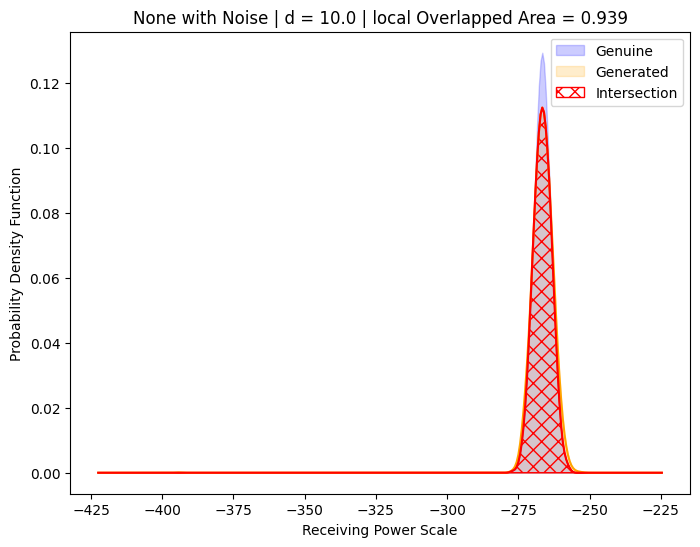

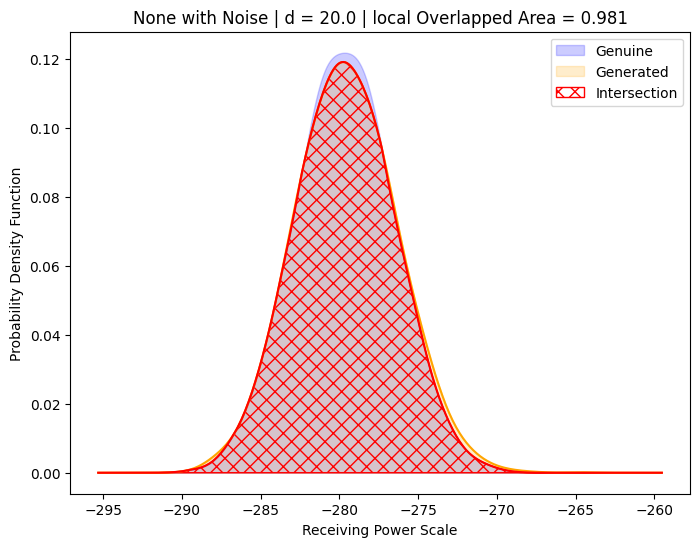

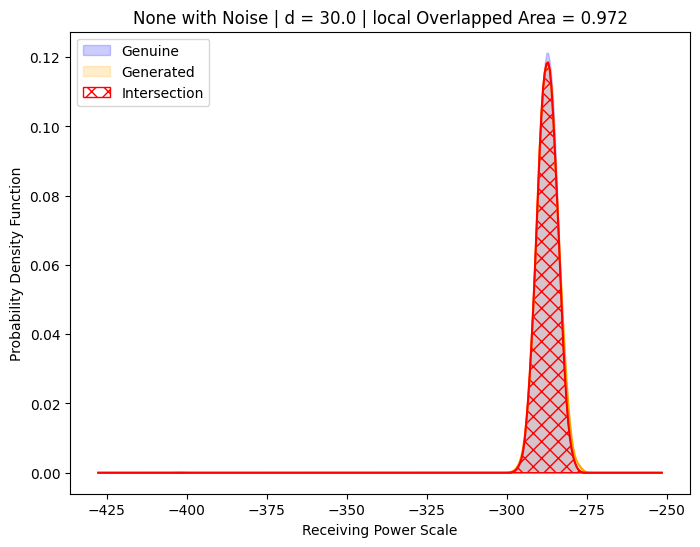

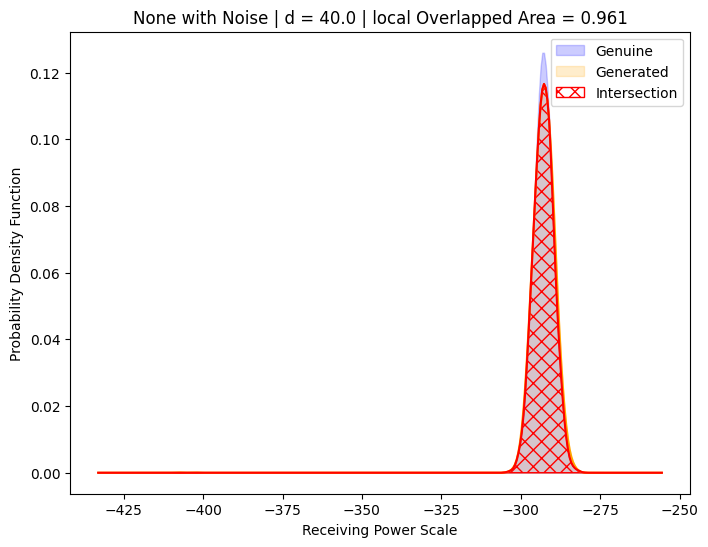

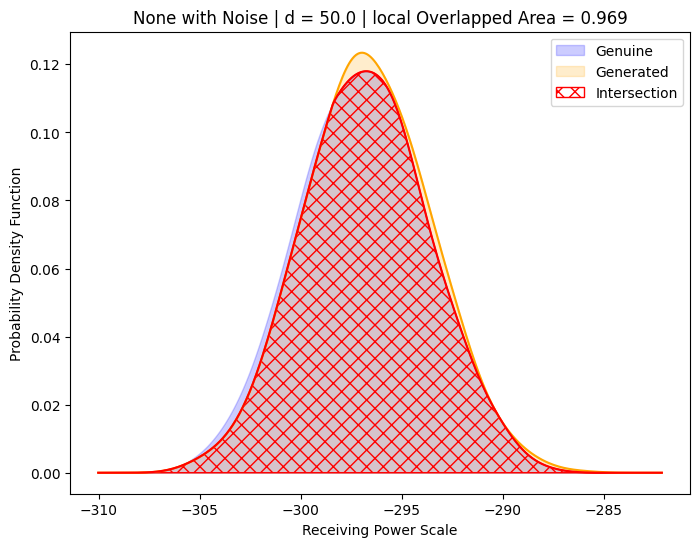

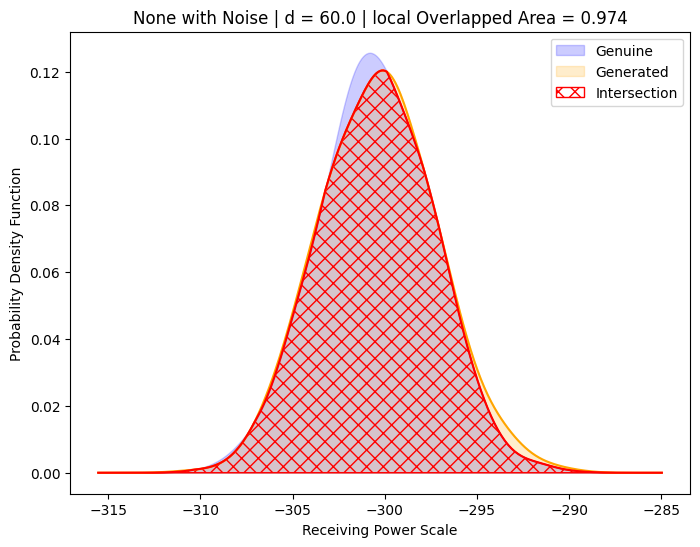

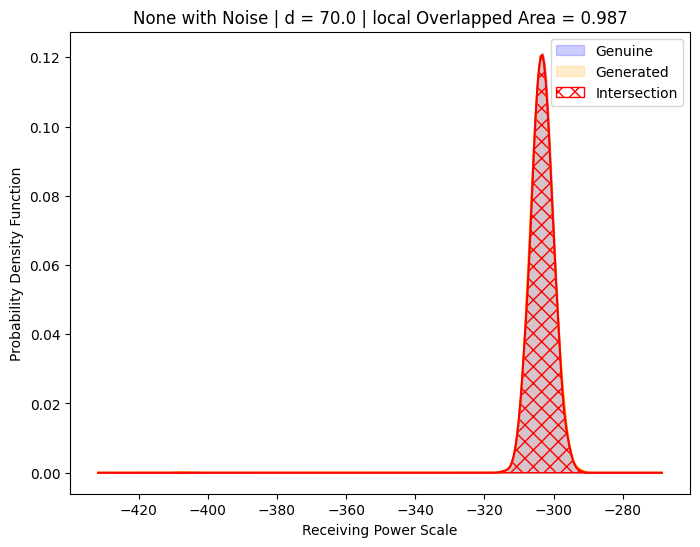

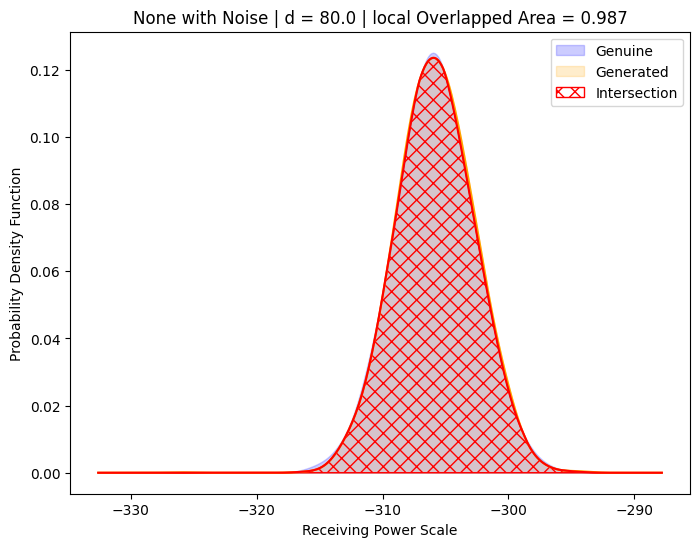

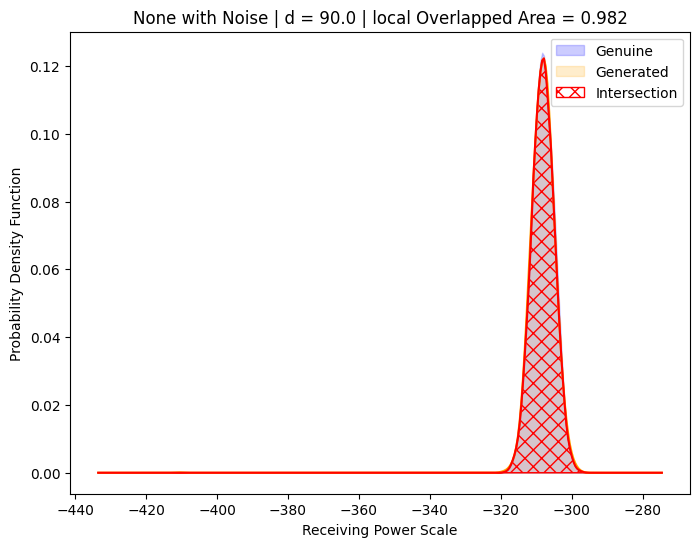

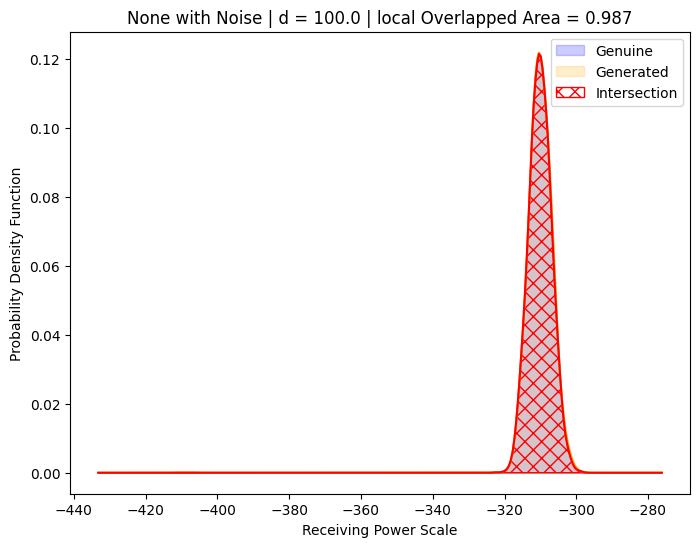

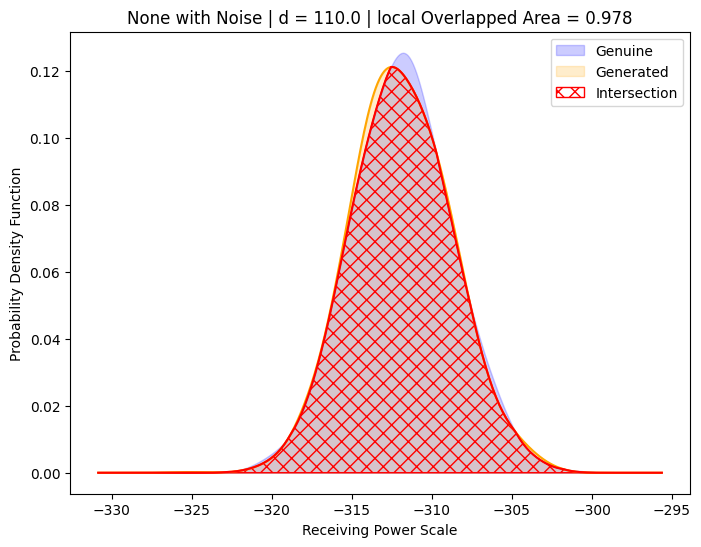

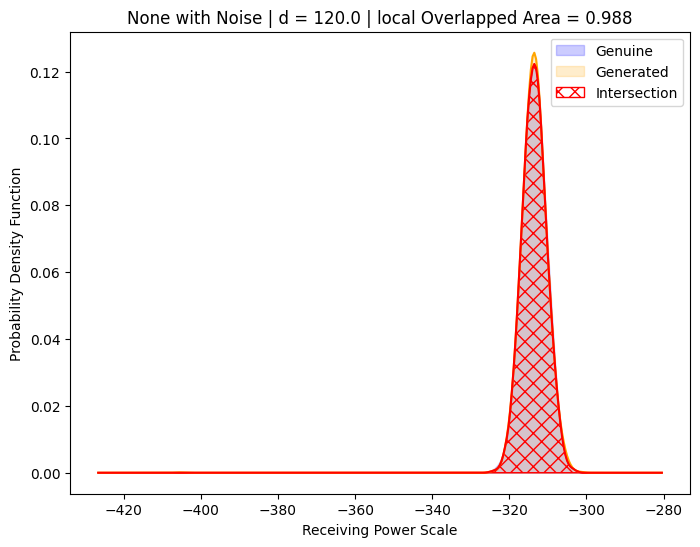

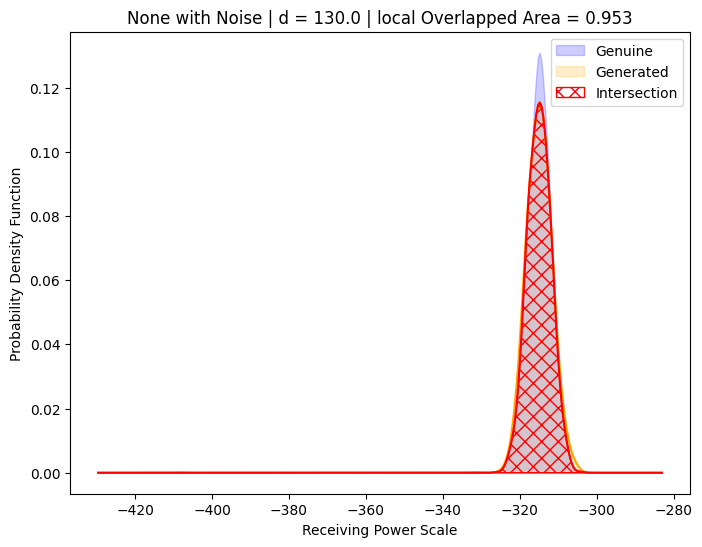

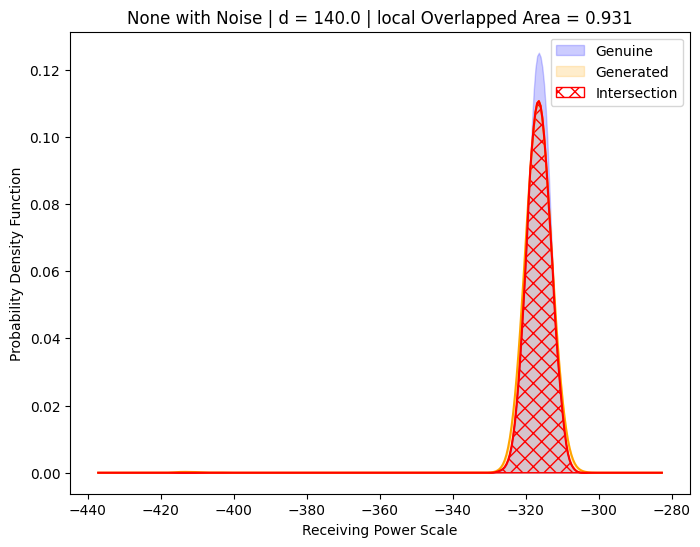

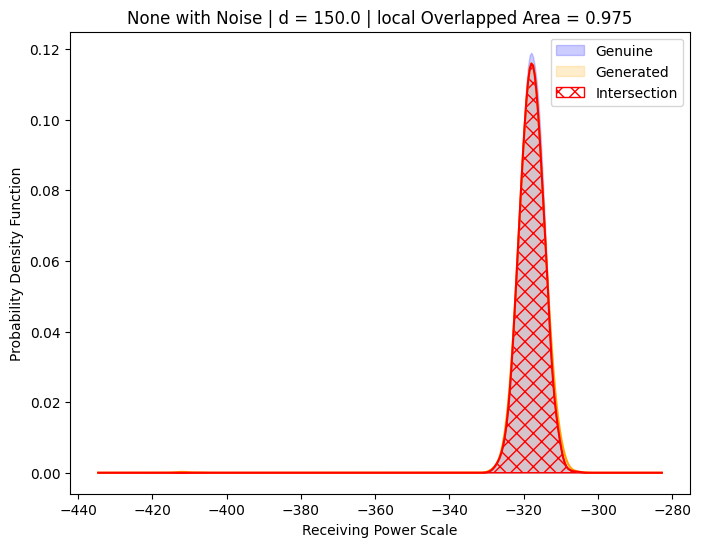

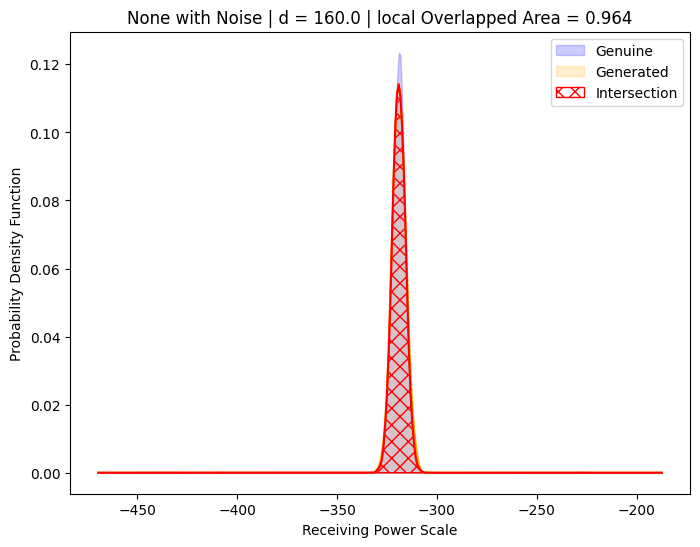

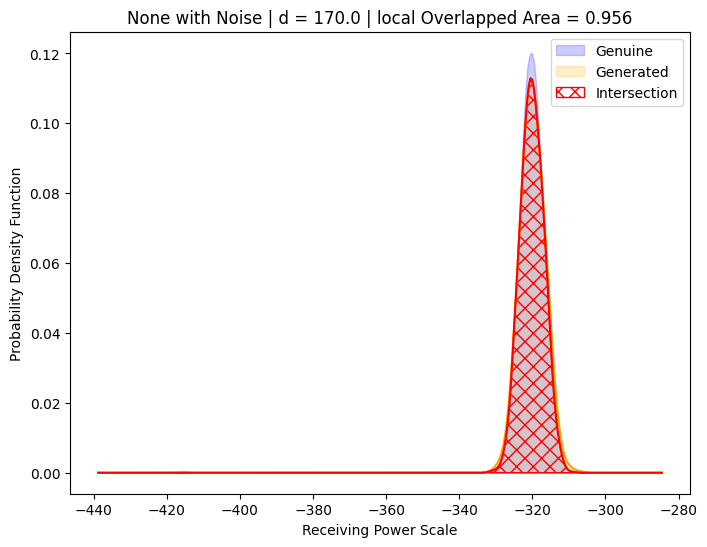

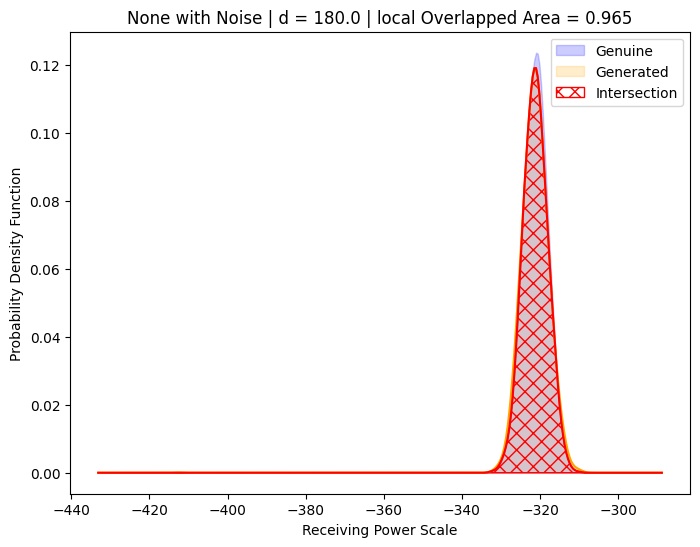

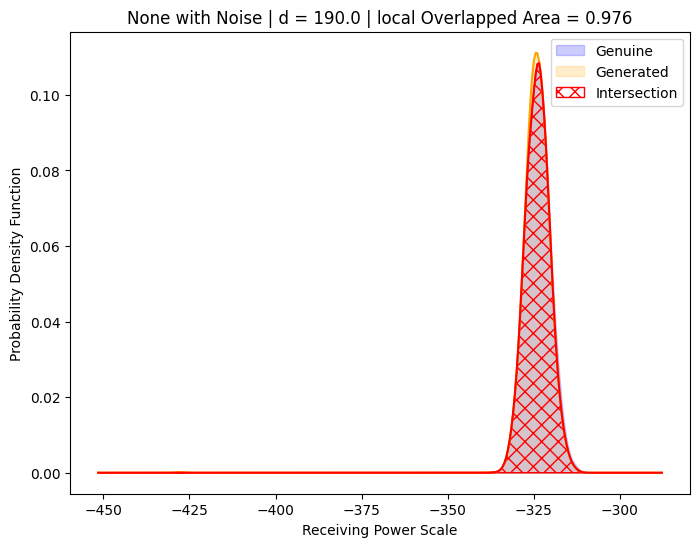

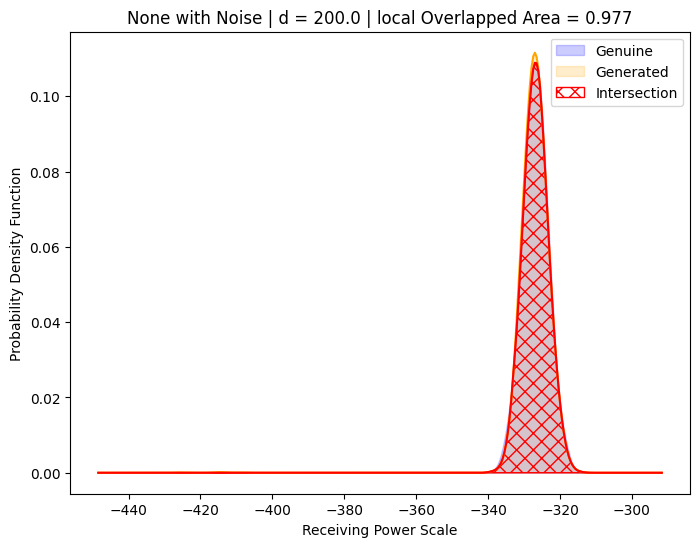

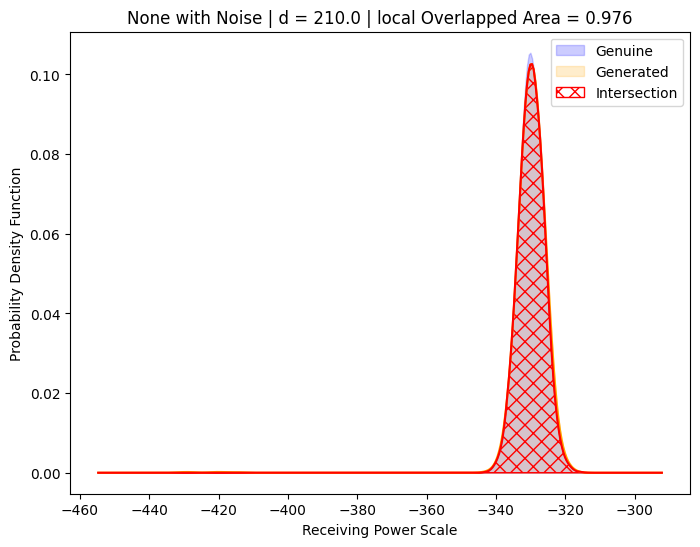

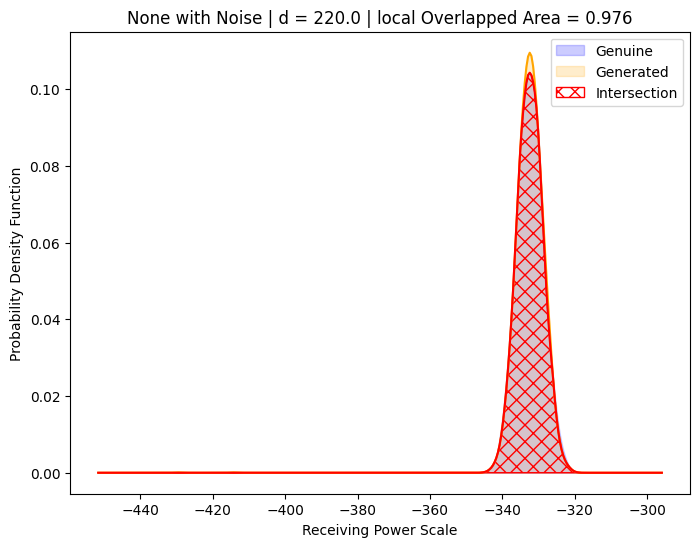

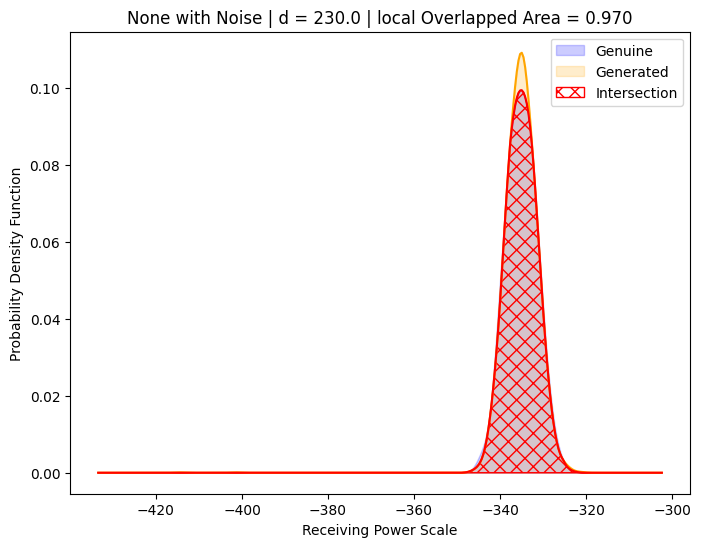

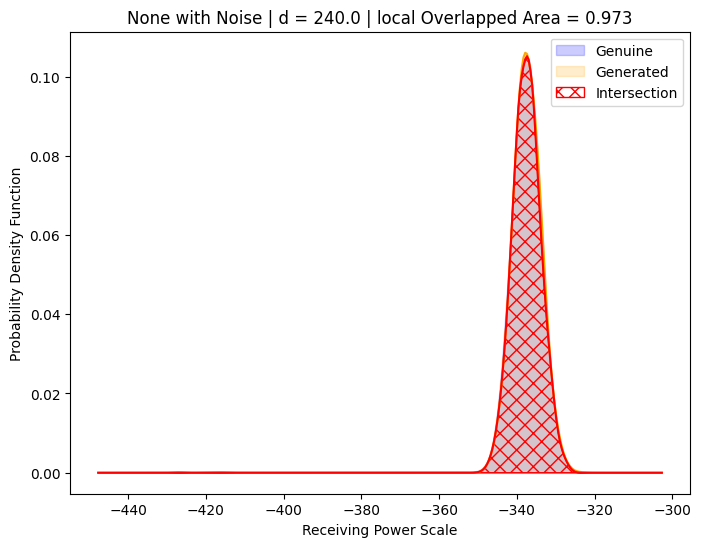

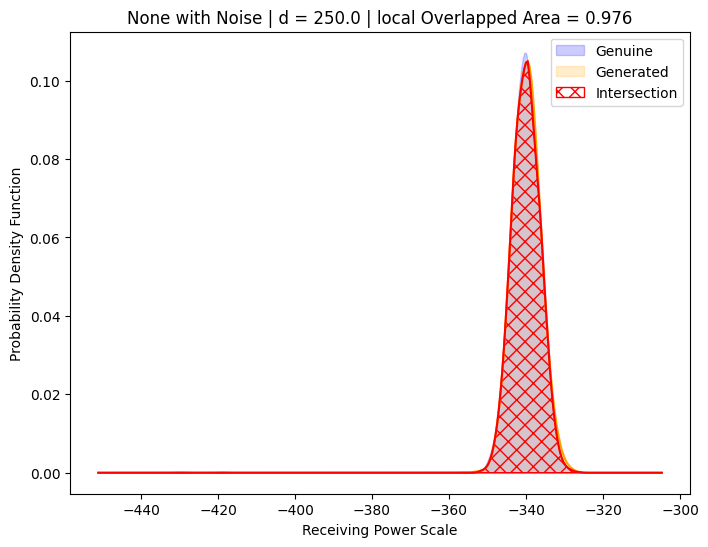

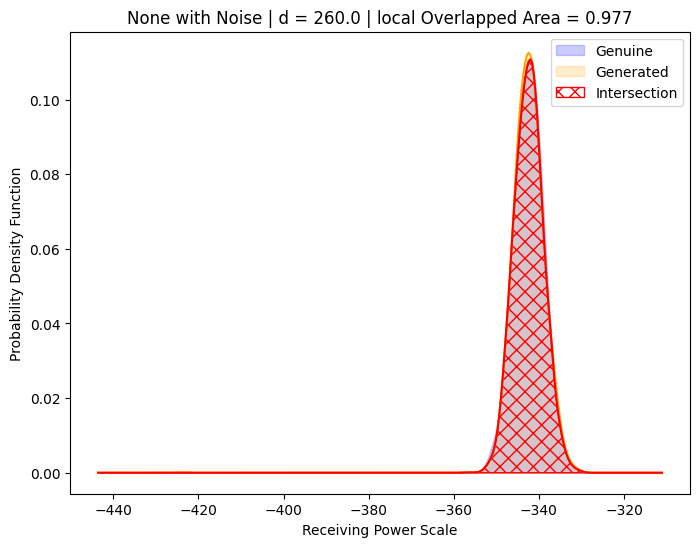

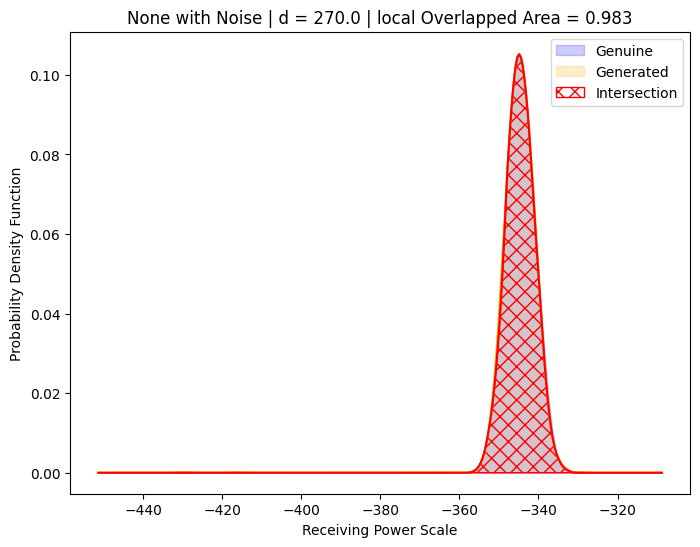

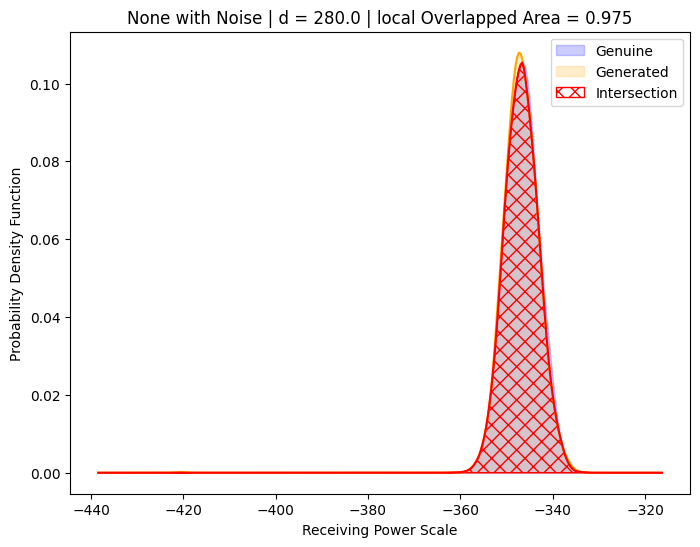

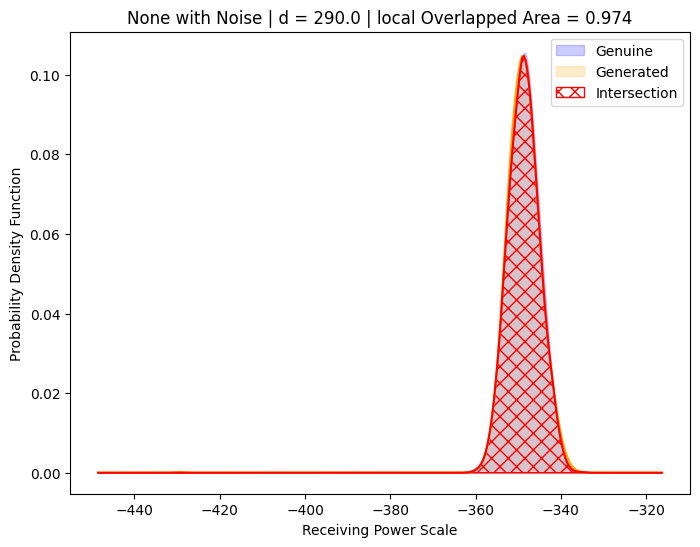

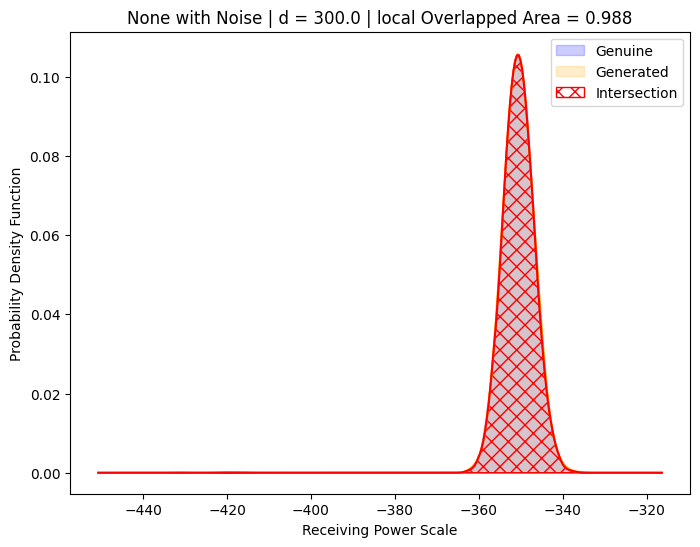

In [15]:
df_ln1_ln2_oa_best = evaluations.evaluation_OA(
    df_to_evaluate=df_ln1_ln2_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [16]:
df_ln1_ln2_oa_best['area_overlapped'].mean()

0.9723096063667427

In [17]:
df_ln1_ln2_oa_best

d  area_overlapped
0    0.0         0.939077
1    1.0         0.981289
2    2.0         0.972480
3    3.0         0.961135
4    4.0         0.968813
5    5.0         0.973769
6    6.0         0.986959
7    7.0         0.986553
8    8.0         0.981914
9    9.0         0.986713
10  10.0         0.977936
11  11.0         0.987521
12  12.0         0.952610
13  13.0         0.931255
14  14.0         0.975332
15  15.0         0.964139
16  16.0         0.955845
17  17.0         0.964832
18  18.0         0.976262
19  19.0         0.977313
20  20.0         0.975556
21  21.0         0.975949
22  22.0         0.969676
23  23.0         0.973264
24  24.0         0.975647
25  25.0         0.976918
26  26.0         0.983434
27  27.0         0.974994
28  28.0         0.974134
29  29.0         0.987970

# LogNormal2 from __Global Median__ LogNormal 1 

In [18]:
name_dir_ln1_ln2_med = "LogNormal1_LogNormal2_median"
dir_sub_ln1_ln2_med = "LogNormal2"
name_model_ln1_ln2_med = "LogNormal"
dir_ln1_ln2_med = f"{dir_main}/{name_dir_ln1_ln2_med}"

list_dir_csv_ln1_ln2_med = list()
for ep in range(max_iterations):
    list_dir_csv_ln1_ln2_med.append(f"{dir_ln1_ln2_med}/{ep}/{dir_sub_ln1_ln2_med}/log.csv")

list_dir_csv_ln1_ln2_med

['../saved_models/LogNormal1_LogNormal2_median/0/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/1/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/2/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/3/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/4/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/5/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/6/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/7/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/8/LogNormal2/log.csv',
 '../saved_models/LogNormal1_LogNormal2_median/9/LogNormal2/log.csv']

In [19]:
list_csv_ln1_ln2_med = list()
for version, local_dir in enumerate(list_dir_csv_ln1_ln2_med):
    local_df_ln1_ln2_med = pd.read_csv(local_dir)
    local_df_ln1_ln2_med['version'] = version
    list_csv_ln1_ln2_med.append(local_df_ln1_ln2_med)

list_csv_ln1_ln2_med

[    epoch      loss  val_loss    avg_oa       std  version
 0       1  1.414186  3.801459  0.004681  0.001932        0
 1       2 -0.239552 -1.458981  0.422031  0.088007        0
 2       3 -0.330791  0.077432  0.120612  0.039948        0
 3       4  0.944706  4.162880  0.003768  0.001894        0
 4       5  0.024673 -1.214267  0.436823  0.135267        0
 5       6 -0.422871 -1.456806  0.514497  0.062750        0
 6       7 -0.842213  0.010784  0.186283  0.015879        0
 7       8  0.239209 -1.188031  0.399650  0.045277        0
 8       9  0.970234 -0.708072  0.282592  0.049072        0
 9      10 -0.751245 -1.313620  0.446205  0.061059        0
 10     11 -1.604720 -1.828178  0.670698  0.067342        0
 11     12 -1.821608 -2.011618  0.797107  0.059568        0
 12     13 -2.095372 -2.117267  0.932100  0.025037        0
 13     14 -2.115910 -2.101884  0.905916  0.026667        0
 14     15 -2.111733 -2.115204  0.925603  0.016982        0,
     epoch      loss  val_loss    avg_o

In [20]:
df_whole_ln1_ln2_med = pd.concat(list_csv_ln1_ln2_med, axis=0).reset_index(drop=True)
df_whole_ln1_ln2_med['metric'] = df_whole_ln1_ln2_med['avg_oa'] - 2 * df_whole_ln1_ln2_med['std']
df_whole_ln1_ln2_med

epoch      loss  val_loss    avg_oa       std  version    metric
0        1  1.414186  3.801459  0.004681  0.001932        0  0.000818
1        2 -0.239552 -1.458981  0.422031  0.088007        0  0.246018
2        3 -0.330791  0.077432  0.120612  0.039948        0  0.040715
3        4  0.944706  4.162880  0.003768  0.001894        0 -0.000020
4        5  0.024673 -1.214267  0.436823  0.135267        0  0.166288
..     ...       ...       ...       ...       ...      ...       ...
145     11 -2.105442 -2.118886  0.931214  0.036471        9  0.858271
146     12 -2.094655 -2.052732  0.843319  0.037771        9  0.767778
147     13 -2.040395 -2.074594  0.871899  0.030254        9  0.811390
148     14 -2.066667 -2.104133  0.909712  0.032198        9  0.845316
149     15 -2.103986 -2.090794  0.893947  0.035036        9  0.823875

[150 rows x 7 columns]

In [21]:
df_whole_ln1_ln2_med[df_whole_ln1_ln2_med['loss'].isna()]['version'].unique()

array([], dtype=int64)

In [22]:
df_whole_ln1_ln2_med.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      0.824288 -0.018509  0.225609  0.056117      4.5  0.113376
2     -0.008160  0.255194  0.241175  0.069129      4.5  0.102917
3     -0.015818 -0.629166  0.265520  0.061462      4.5  0.142597
4     -0.045648  0.010794  0.227145  0.041051      4.5  0.145042
5     -0.472125 -0.688689  0.304138  0.075435      4.5  0.153268
6     -0.566356 -1.103602  0.416672  0.060997      4.5  0.294678
7     -0.308407 -0.096687  0.274072  0.048209      4.5  0.177654
8     -0.398715 -0.697253  0.414806  0.050435      4.5  0.313937
9     -0.610412 -1.162184  0.460257  0.062792      4.5  0.334672
10    -0.603830 -1.364493  0.492752  0.062279      4.5  0.368193
11    -1.257790 -1.481809  0.604757  0.055573      4.5  0.493612
12    -1.620591 -1.882478  0.766350  0.071299      4.5  0.623751
13    -1.932194 -2.045750  0.857365  0.044189      4.5  0.768987
14    -1.910424 -1.884643  0.846513  0.035386      4.5  0.775742
15    -1.920685 -2.006653  0.854768  0.052224      4.5  0.750320

In [23]:
df_whole_ln1_ln2_med.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_ln1_ln2_med.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.225609
 2     0.241175
 3     0.265520
 4     0.227145
 5     0.304138
 6     0.416672
 7     0.274072
 8     0.414806
 9     0.460257
 10    0.492752
 11    0.604757
 12    0.766350
 13    0.857365
 14    0.846513
 15    0.854768
 Name: avg_oa, dtype: float64,
 epoch
 1     0.151488
 2     0.156570
 3     0.098595
 4     0.153072
 5     0.130000
 6     0.190409
 7     0.178695
 8     0.263068
 9     0.288455
 10    0.236368
 11    0.272489
 12    0.180333
 13    0.093312
 14    0.245652
 15    0.149704
 Name: avg_oa, dtype: float64)

In [24]:
df_whole_ln1_ln2_med.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_801634/2151708036.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_ln1_ln2_med.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss    avg_oa       std  version    metric
epoch                                                                      
1     0        1  1.414186  3.801459  0.004681  0.001932        0  0.000818
      15       1  0.763746 -0.688474  0.272554  0.041464        1  0.189625
      30       1  1.206414 -0.048703  0.125862  0.064927        2 -0.003993
      45       1  0.651949  0.635458  0.094927  0.030400        3  0.034128
      60       1  0.537179 -1.051870  0.386424  0.148718        4  0.088988
...          ...       ...       ...       ...       ...      ...       ...
15    89      15 -2.097164 -2.122503  0.933205  0.033699        5  0.865806
      104     15 -2.082520 -2.037751  0.835269  0.025356        6  0.784556
      119     15 -2.111424 -2.128406  0.947690  0.068001        7  0.811687
      134     15 -2.081472 -2.078922  0.873631  0.031572        8  0.810487
      149     15 -2.103986 -2.090794  0.893947  0.035036        9  0.823875

[150 rows x 7 columns]

## Best LogNormal 2 from Global Median LogNormal1

In [25]:
# Best Nakagami Model
best_version_ln1_ln2_med = df_whole_ln1_ln2_med.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_ln1_ln2_med = df_whole_ln1_ln2_med.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_ln1_ln2_med.sort_values(by='metric', ascending=False)

epoch      loss  val_loss    avg_oa       std  version    metric
133     14 -2.112900 -2.127849  0.956747  0.015769        8  0.925210
43      14 -2.015544 -2.117460  0.941490  0.019156        2  0.903178
14      15 -2.111733 -2.115204  0.925603  0.016982        0  0.891638
132     13 -2.096369 -2.118761  0.934224  0.021973        8  0.890277
12      13 -2.095372 -2.117267  0.932100  0.025037        0  0.882026
..     ...       ...       ...       ...       ...      ...       ...
77       3  0.119421 -0.706030  0.190127  0.124285        5 -0.058443
69      10  1.172581 -0.406147  0.144680  0.101803        4 -0.058926
31       2 -0.722425  4.477092  0.147792  0.106785        2 -0.065778
68       9  0.733142  0.818726  0.028422  0.061330        4 -0.094238
76       2  0.117672  2.026635  0.025834  0.062899        5 -0.099963

[150 rows x 7 columns]

In [26]:
best_version_ln1_ln2_med, best_epoch_ln1_ln2_med

(8, 14)

In [27]:
df_ln1_ln2_med_test_back_scaled = df_ln2_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_ln1_ln2_med}/{best_version_ln1_ln2_med}/{dir_sub_ln1_ln2_med}/{name_model_ln1_ln2_med}_ep_{str(best_epoch_ln1_ln2_med).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_ln1_ln2_med_data = model_mdn.predict(df_ln1_ln2_med_test_back_scaled['d'])
df_ln1_ln2_med_test_back_scaled['generated'] = utils.inverse_log_transform_ln(np.squeeze(predicted_ln1_ln2_med_data))



3125/3125 [==============================] - 3s 996us/step


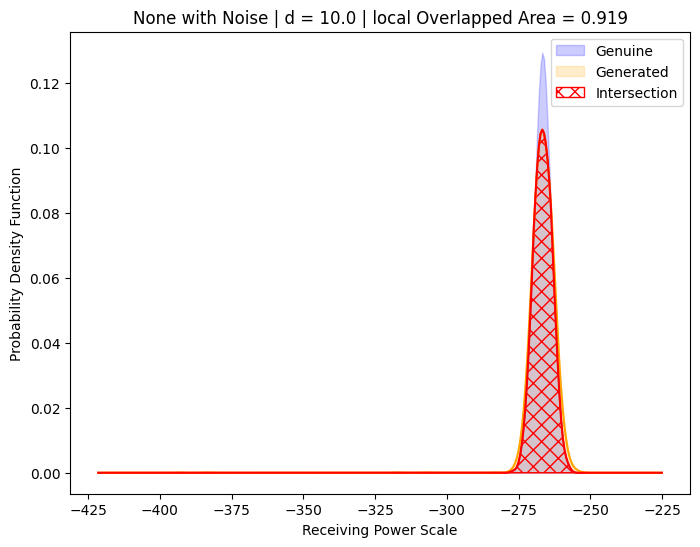

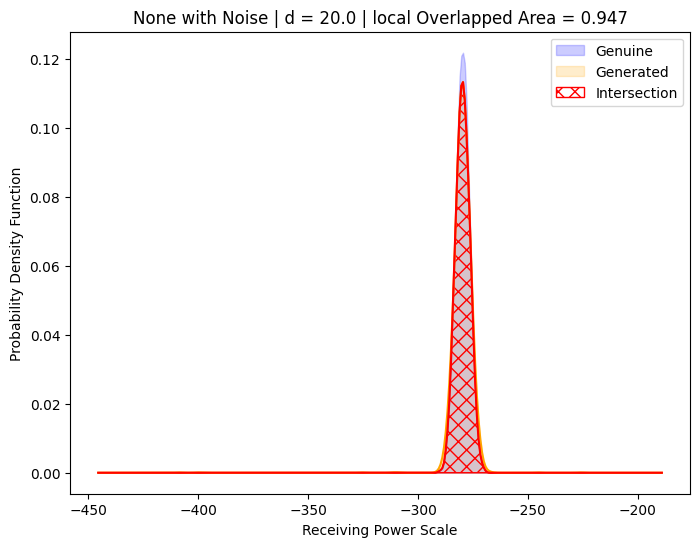

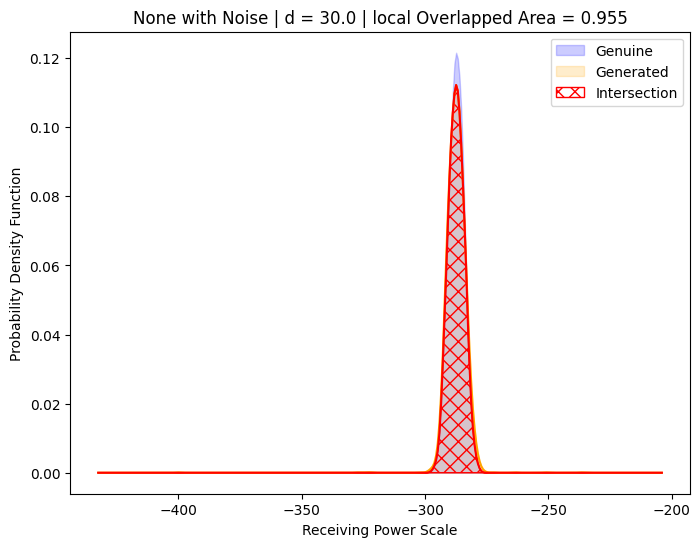

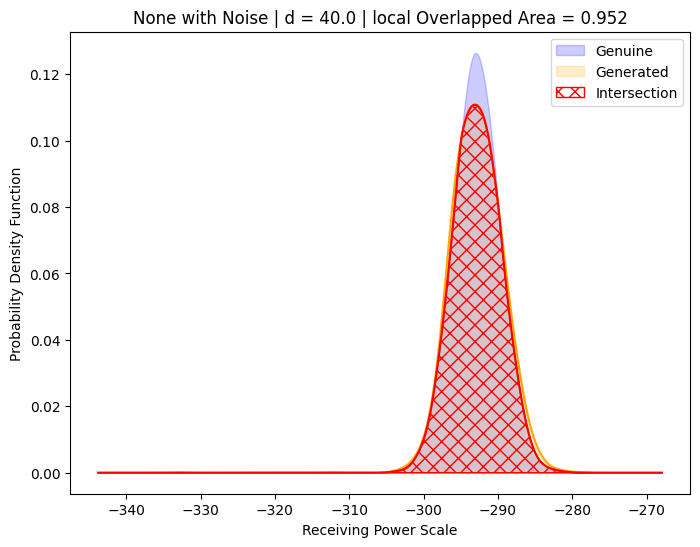

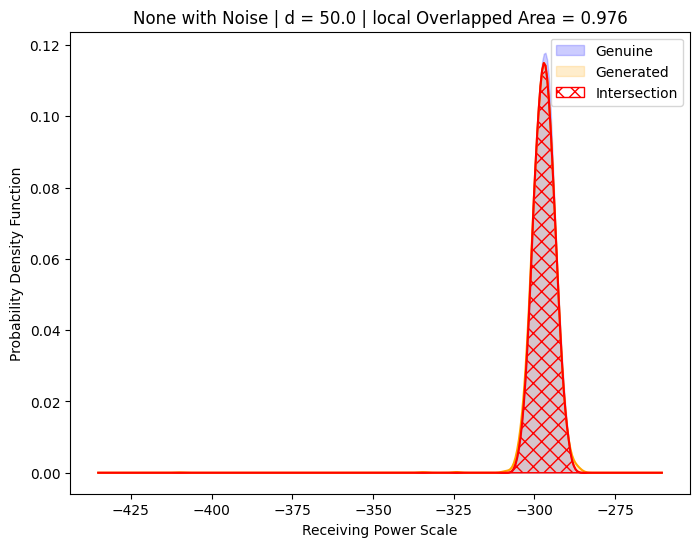

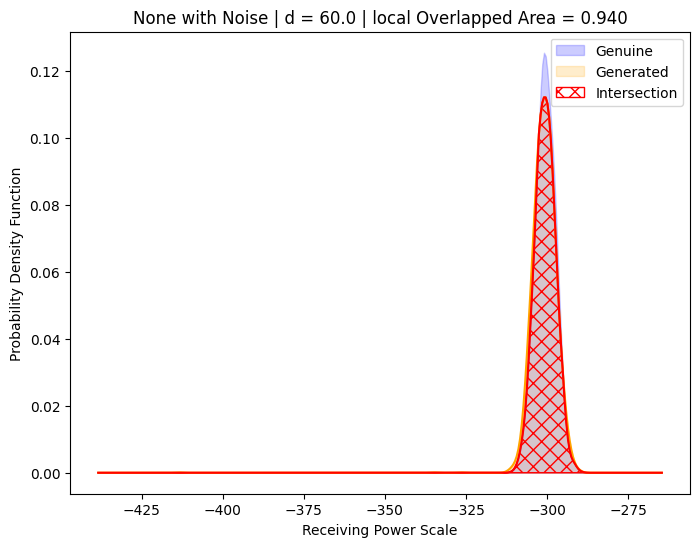

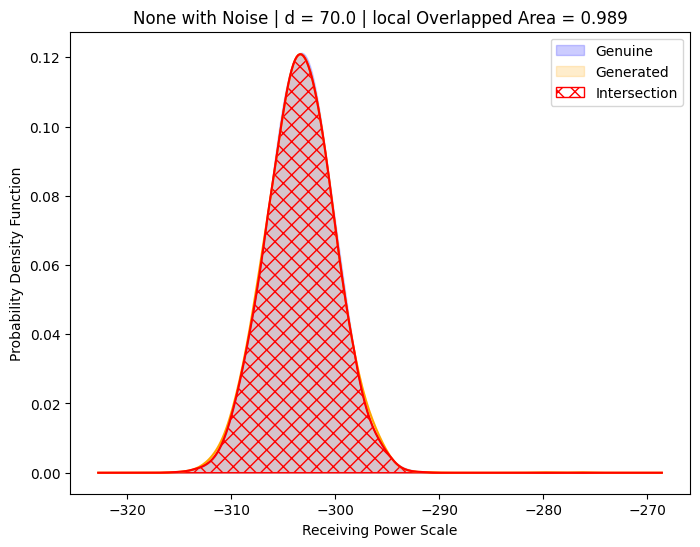

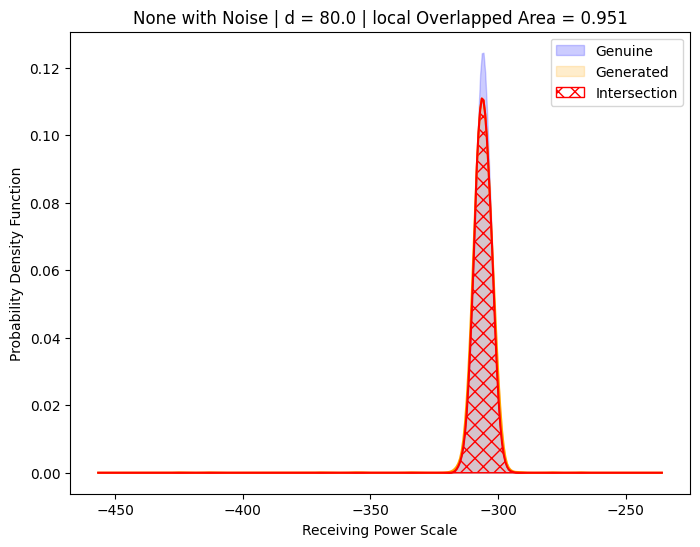

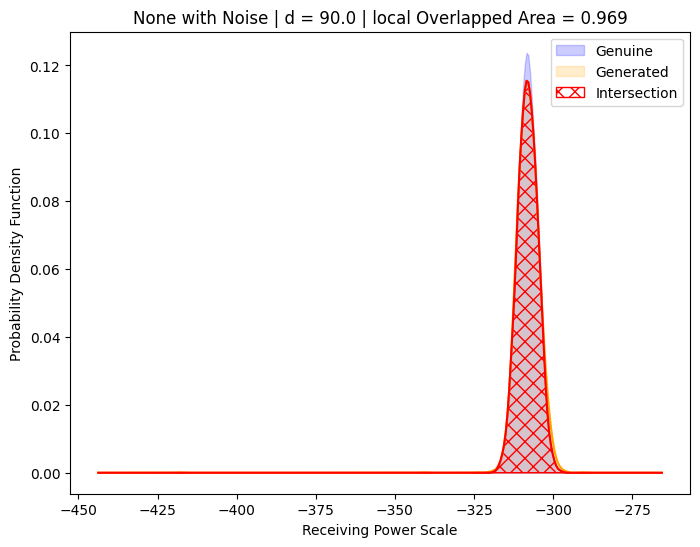

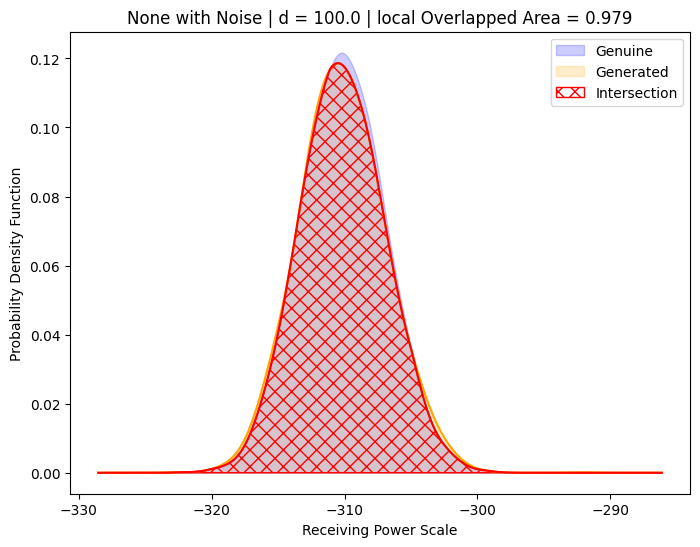

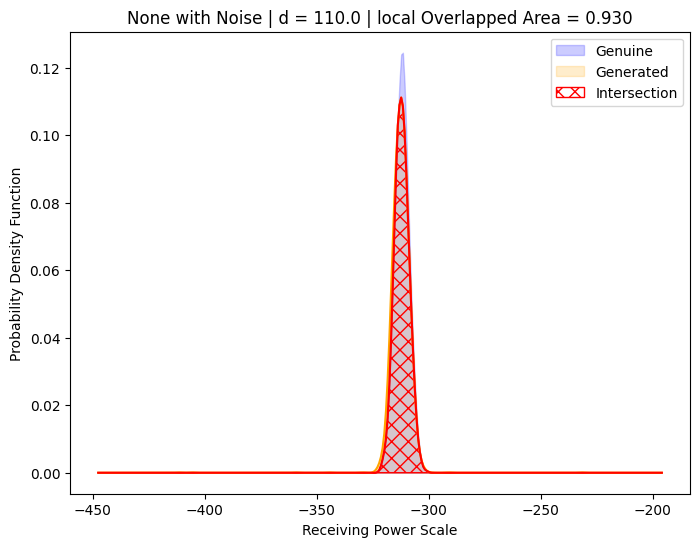

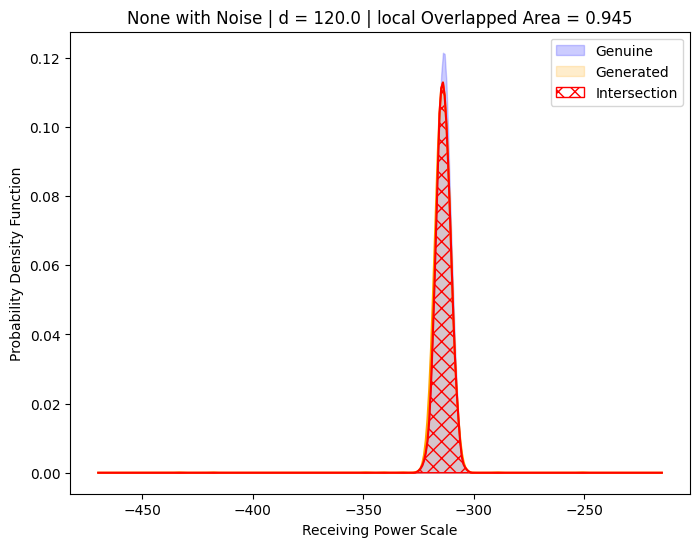

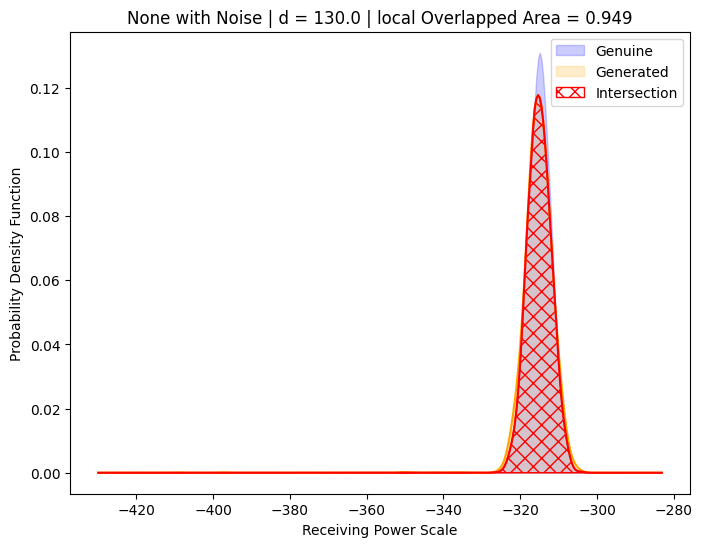

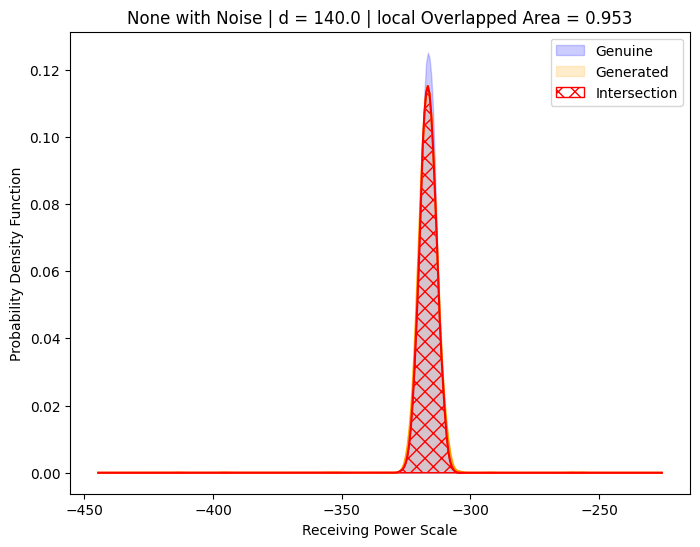

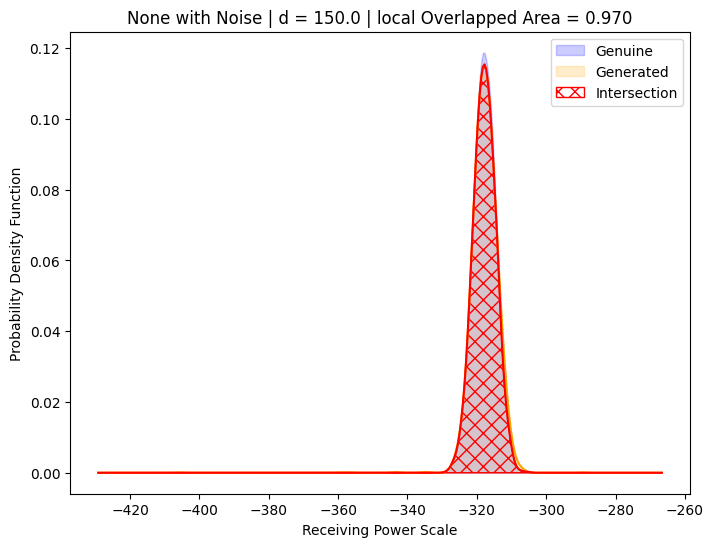

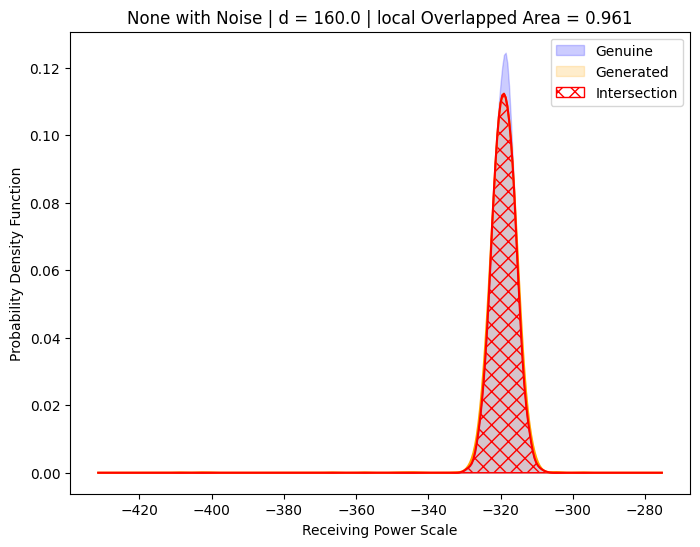

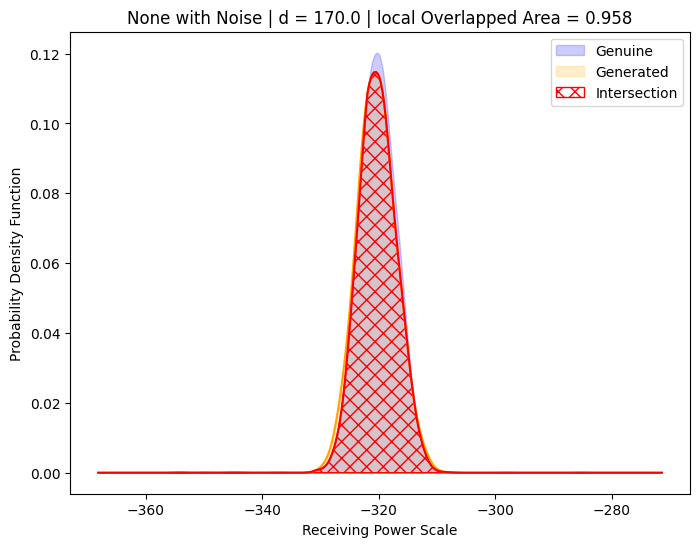

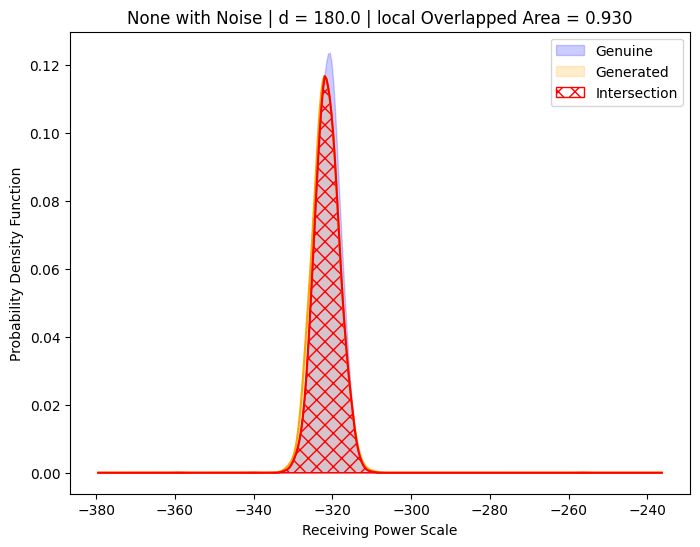

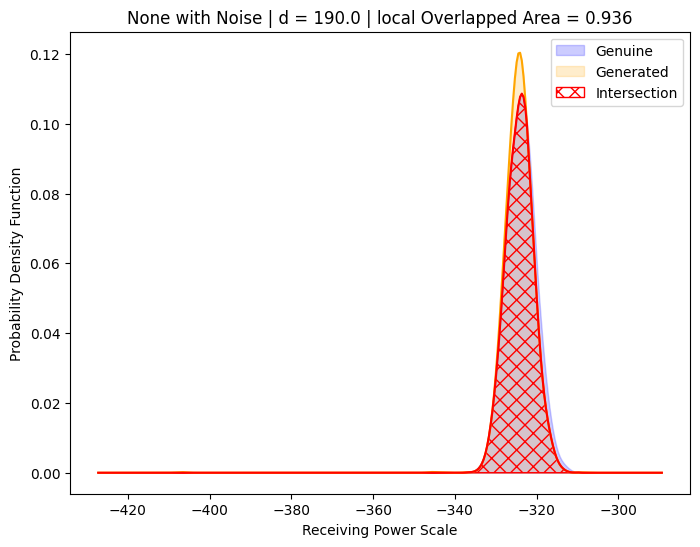

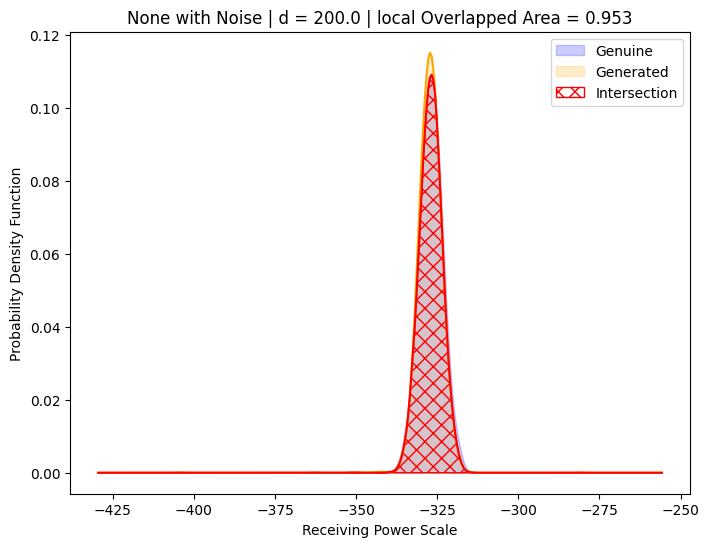

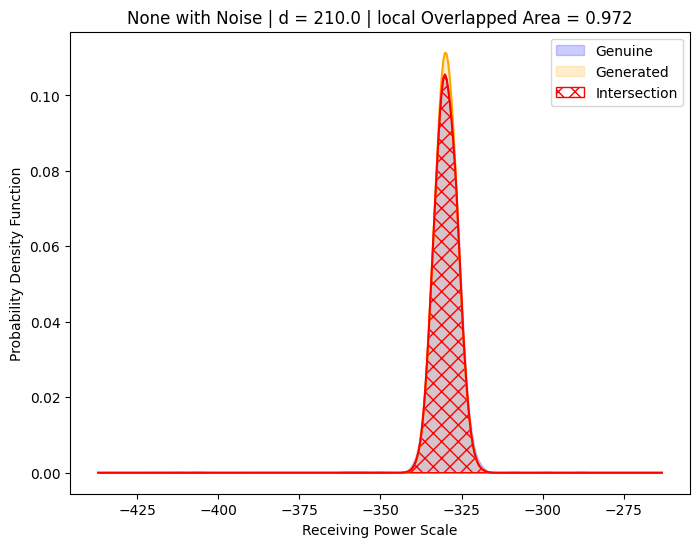

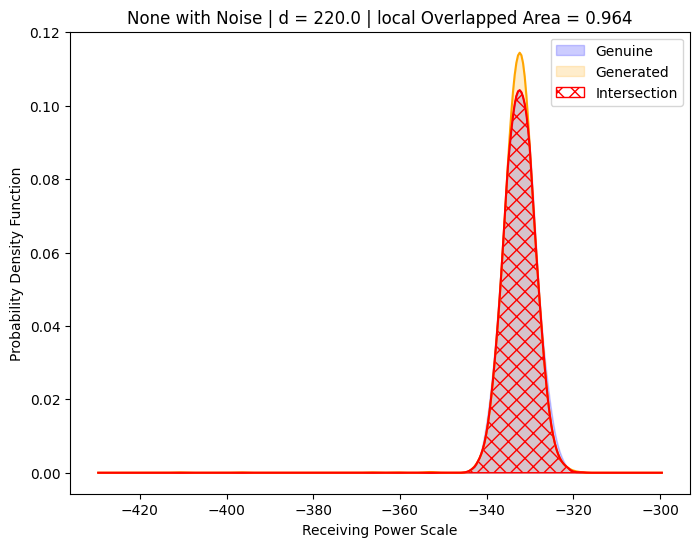

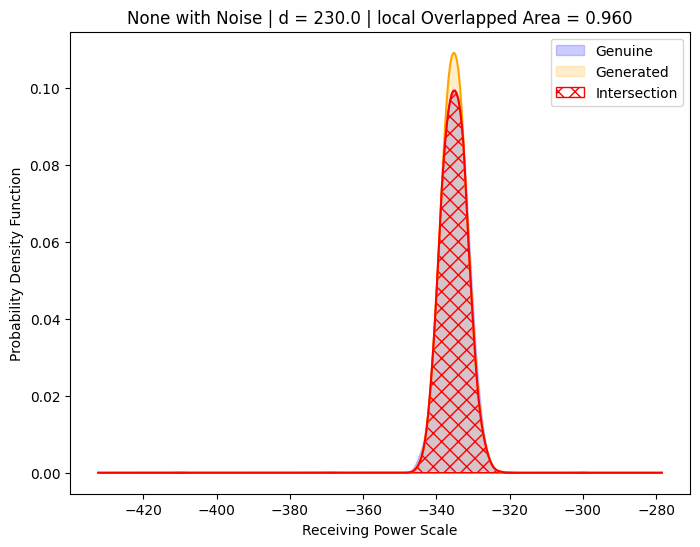

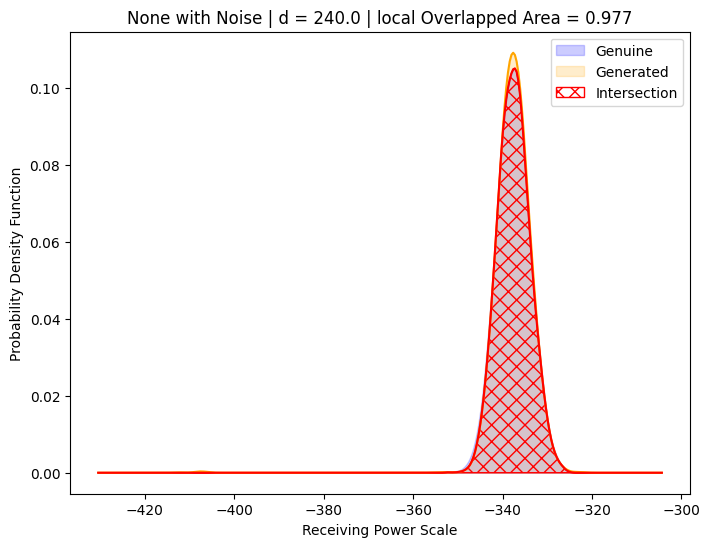

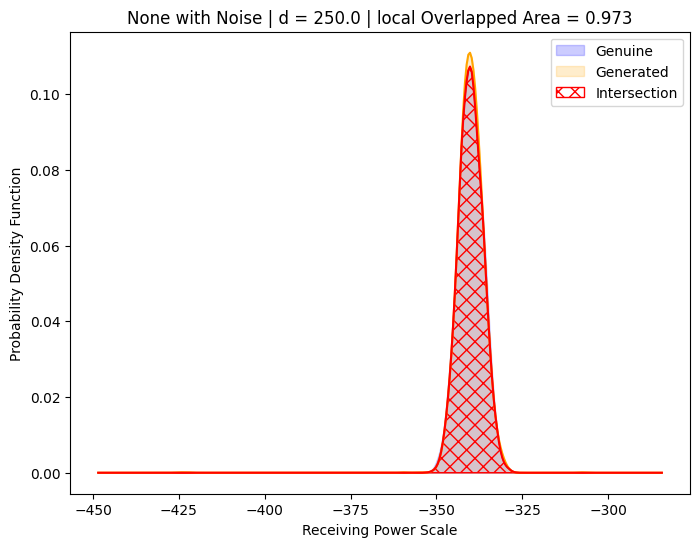

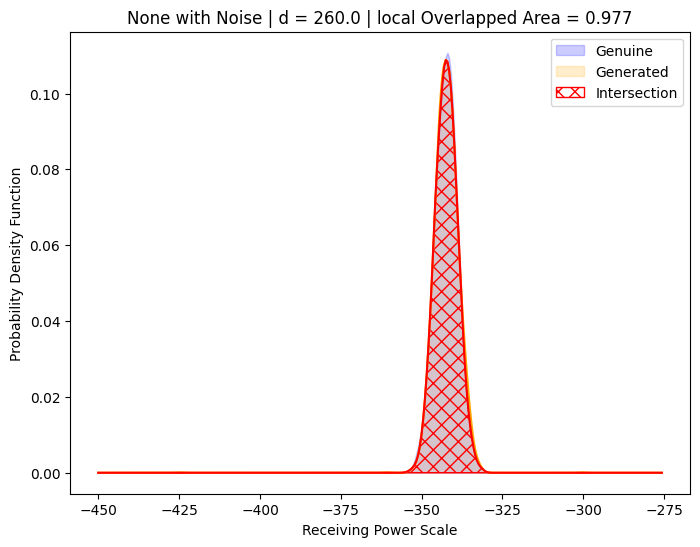

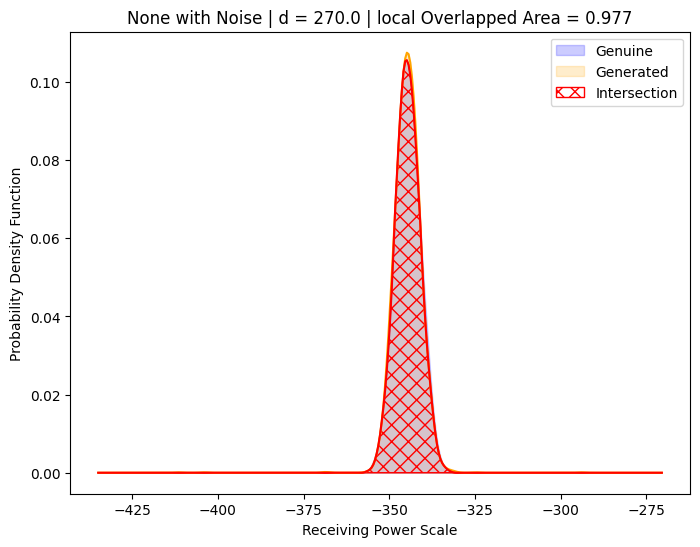

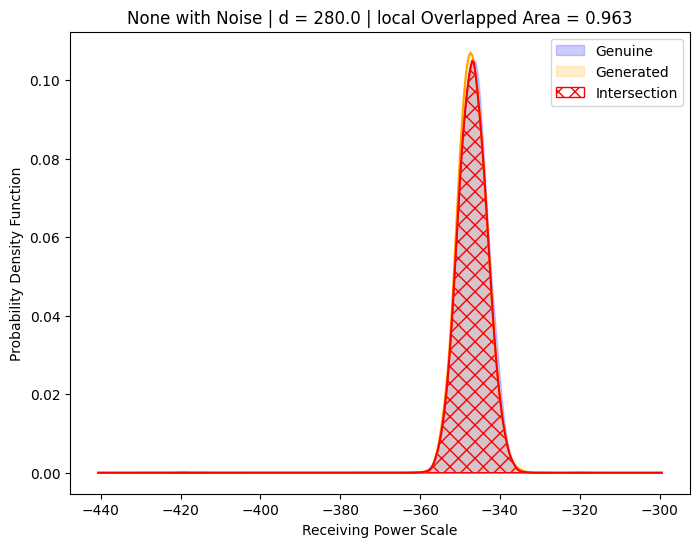

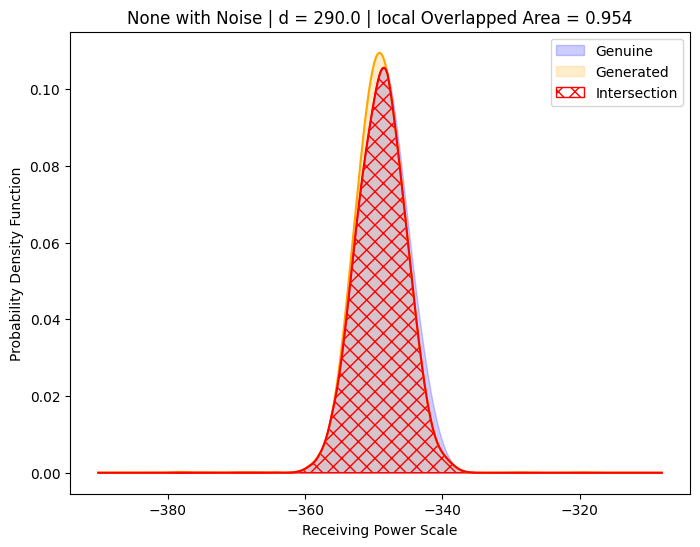

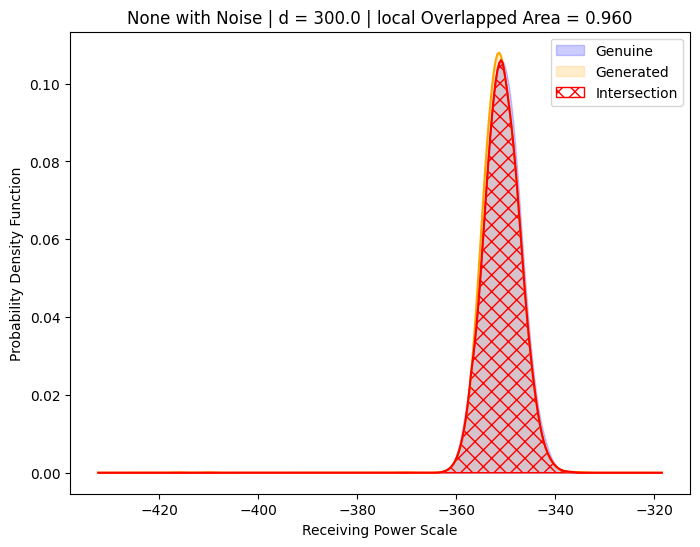

In [28]:
df_ln1_ln2_med_oa_best = evaluations.evaluation_OA(
    df_to_evaluate=df_ln1_ln2_med_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [29]:
df_ln1_ln2_med_oa_best['area_overlapped'].mean()

0.9579814635184829

In [30]:
df_ln1_ln2_med_oa_best

d  area_overlapped
0    0.0         0.919066
1    1.0         0.946893
2    2.0         0.954562
3    3.0         0.952475
4    4.0         0.975653
5    5.0         0.939786
6    6.0         0.988643
7    7.0         0.950813
8    8.0         0.968528
9    9.0         0.979319
10  10.0         0.930223
11  11.0         0.945376
12  12.0         0.948839
13  13.0         0.952697
14  14.0         0.970310
15  15.0         0.961325
16  16.0         0.958067
17  17.0         0.930160
18  18.0         0.935689
19  19.0         0.953351
20  20.0         0.971710
21  21.0         0.964080
22  22.0         0.959768
23  23.0         0.976573
24  24.0         0.973438
25  25.0         0.977002
26  26.0         0.977453
27  27.0         0.963417
28  28.0         0.954029
29  29.0         0.960197

# LogNormal2 from __Random Init__ 

In [31]:
name_dir_ln2_f = 'LogNormal2_from_N_False'
dir_sub_ln2_f = "LogNormal"
dir_ln2_f = f"{dir_main}/{name_dir_ln2_f}"

list_dir_csv_ln2_f = list()
for ep in range(max_iterations):
    list_dir_csv_ln2_f.append(f"{dir_ln2_f}/{ep}/{dir_sub_ln2_f}/log.csv")

list_dir_csv_ln2_f

['../saved_models/LogNormal2_from_N_False/0/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/1/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/2/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/3/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/4/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/5/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/6/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/7/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/8/LogNormal/log.csv',
 '../saved_models/LogNormal2_from_N_False/9/LogNormal/log.csv']

In [32]:
list_csv_ln2_f = list()
for version, local_dir in enumerate(list_dir_csv_ln2_f):
    local_df_ln2_f = pd.read_csv(local_dir)
    local_df_ln2_f['version'] = version
    list_csv_ln2_f.append(local_df_ln2_f)

list_csv_ln2_f

[    epoch      loss  val_loss        avg_oa           std  version
 0       1  3.276441  2.383422  5.273100e-89  2.888196e-88        0
 1       2  1.551965 -0.020412  1.475498e-01  5.660898e-02        0
 2       3  0.946180  1.103857  4.301605e-02  8.193808e-02        0
 3       4  0.017431 -0.568230  2.782494e-01  8.684951e-02        0
 4       5  0.184551  2.437317  2.317612e-02  9.976895e-03        0
 5       6  0.109149 -0.219710  1.923985e-01  4.718192e-02        0
 6       7 -0.436891 -0.670966  2.757755e-01  3.791407e-02        0
 7       8 -0.377498 -0.098191  1.636504e-01  2.987807e-02        0
 8       9 -0.387979 -0.944183  2.874167e-01  7.408020e-02        0
 9      10 -0.581612  1.117160  1.645063e-01  1.138183e-01        0
 10     11 -0.397531 -0.741262  2.996567e-01  7.262983e-02        0
 11     12  0.151069 -1.023241  3.722192e-01  6.720246e-02        0
 12     13  0.389313 -0.489066  1.772433e-01  7.039270e-02        0
 13     14  0.167716 -0.912321  1.890106e-01  4.

In [33]:
df_whole_ln2_f = pd.concat(list_csv_ln2_f, axis=0).reset_index(drop=True)
df_whole_ln2_f['metric'] = df_whole_ln2_f['avg_oa'] - 2 * df_whole_ln2_f['std']
df_whole_ln2_f

epoch      loss  val_loss        avg_oa           std  version  \
0        1  3.276441  2.383422  5.273100e-89  2.888196e-88        0   
1        2  1.551965 -0.020412  1.475498e-01  5.660898e-02        0   
2        3  0.946180  1.103857  4.301605e-02  8.193808e-02        0   
3        4  0.017431 -0.568230  2.782494e-01  8.684951e-02        0   
4        5  0.184551  2.437317  2.317612e-02  9.976895e-03        0   
..     ...       ...       ...           ...           ...      ...   
145     11  1.044105  0.920506  7.204039e-02  1.742108e-02        9   
146     12 -0.959615 -0.020178  3.557529e-01  4.386942e-02        9   
147     13 -0.654736 -1.478931  6.194298e-01  8.314940e-02        9   
148     14 -0.377370 -1.660568  5.383400e-01  5.114898e-02        9   
149     15 -1.384848 -1.830791  6.333829e-01  5.739467e-02        9   

           metric  
0   -5.249081e-88  
1    3.433188e-02  
2   -1.208601e-01  
3    1.045503e-01  
4    3.222328e-03  
..            ...  
145  3.719823e-02  
146  2.680141e-01  
147  4.531310e-01  
148  4.360420e-01  
149  5.185936e-01  

[150 rows x 7 columns]

In [34]:
df_whole_ln2_f[df_whole_ln2_f['loss'].isna()]['version'].unique()

array([], dtype=int64)

In [35]:
df_whole_ln2_f[df_whole_ln2_f['loss'].isna()]


Empty DataFrame
Columns: [epoch, loss, val_loss, avg_oa, std, version, metric]
Index: []

In [36]:
df_whole_ln2_f.groupby(by=['epoch']).mean()

loss  val_loss    avg_oa       std  version    metric
epoch                                                           
1      3.156781  2.594546  0.009720  0.023602      4.5 -0.037484
2      1.591693  1.371449  0.058981  0.041858      4.5 -0.024735
3      0.949998  0.354058  0.125356  0.055831      4.5  0.013693
4      0.455425  0.161826  0.171243  0.054947      4.5  0.061349
5      0.436185 -0.015889  0.130327  0.066656      4.5 -0.002985
6     -0.019363 -0.006724  0.231034  0.073371      4.5  0.084292
7     -0.193199 -0.484274  0.298483  0.056897      4.5  0.184689
8     -0.350128 -0.899756  0.383618  0.059546      4.5  0.264527
9     -0.648827 -0.826515  0.434828  0.066342      4.5  0.302144
10    -0.746131  0.244771  0.352663  0.054366      4.5  0.243931
11    -0.660884 -1.078300  0.529954  0.054476      4.5  0.421002
12    -1.061764 -1.186359  0.558249  0.048709      4.5  0.460832
13    -0.737834 -1.307005  0.566306  0.060767      4.5  0.444771
14    -0.881074 -1.277306  0.522798  0.045039      4.5  0.432721
15    -1.472817 -1.635370  0.593671  0.059437      4.5  0.474797

In [37]:
df_whole_ln2_f.groupby(by=['epoch'])['avg_oa'].mean(), df_whole_ln2_f.groupby(by=['epoch'])['avg_oa'].std()

(epoch
 1     0.009720
 2     0.058981
 3     0.125356
 4     0.171243
 5     0.130327
 6     0.231034
 7     0.298483
 8     0.383618
 9     0.434828
 10    0.352663
 11    0.529954
 12    0.558249
 13    0.566306
 14    0.522798
 15    0.593671
 Name: avg_oa, dtype: float64,
 epoch
 1     0.006747
 2     0.046888
 3     0.086353
 4     0.123606
 5     0.075627
 6     0.079414
 7     0.185479
 8     0.210896
 9     0.291916
 10    0.271130
 11    0.336320
 12    0.325341
 13    0.325804
 14    0.320540
 15    0.240875
 Name: avg_oa, dtype: float64)

In [38]:
df_whole_ln2_f.groupby(by=['epoch']).apply(lambda x: x)

/tmp/ipykernel_801634/2652949570.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_whole_ln2_f.groupby(by=['epoch']).apply(lambda x: x)


epoch      loss  val_loss         avg_oa           std  version  \
epoch                                                                        
1     0        1  3.276441  2.383422   5.273100e-89  2.888196e-88        0   
      15       1  3.154467  2.052520  3.527408e-190  0.000000e+00        1   
      30       1  2.975976  3.096375   1.275873e-02  1.871571e-02        2   
      45       1  2.625829  3.456990   1.915967e-02  2.176419e-02        3   
      60       1  3.427108  1.295750   1.068724e-02  3.797545e-02        4   
...          ...       ...       ...            ...           ...      ...   
15    89      15 -2.006085 -2.093168   8.729461e-01  3.888905e-02        5   
      104     15 -1.332125 -1.841565   3.397855e-01  1.189872e-01        6   
      119     15 -2.093014 -2.129548   9.561187e-01  3.463228e-02        7   
      134     15 -2.091892 -2.002609   8.185765e-01  5.580555e-02        8   
      149     15 -1.384848 -1.830791   6.333829e-01  5.739467e-02        9   

                  metric  
epoch                     
1     0    -5.249081e-88  
      15   3.527408e-190  
      30   -2.467269e-02  
      45   -2.436872e-02  
      60   -6.526367e-02  
...                  ...  
15    89    7.951680e-01  
      104   1.018111e-01  
      119   8.868541e-01  
      134   7.069654e-01  
      149   5.185936e-01  

[150 rows x 7 columns]

## Best LN2 with Random Init

In [39]:
# Best Nakagami Model
best_version_ln2_f = df_whole_ln2_f.sort_values(by='metric', ascending=False).iloc[[0]]['version'].values[0]
best_epoch_ln2_f = df_whole_ln2_f.sort_values(by='metric', ascending=False).iloc[[0]]['epoch'].values[0]
df_whole_ln2_f.sort_values(by='metric', ascending=False)

epoch      loss  val_loss    avg_oa       std  version    metric
132     13 -2.109830 -2.124515  0.953866  0.024605        8  0.904657
119     15 -2.093014 -2.129548  0.956119  0.034632        7  0.886854
131     12 -1.844351 -2.109748  0.914062  0.026048        8  0.861966
41      12 -2.119335 -2.127322  0.937003  0.041535        2  0.853934
88      14 -2.095777 -2.123733  0.912064  0.047975        5  0.816113
..     ...       ...       ...       ...       ...      ...       ...
64       5  0.748966 -0.838249  0.112154  0.100241        4 -0.088329
77       3  1.128726  0.247177  0.081082  0.093382        5 -0.105683
34       5 -1.083570 -1.829789  0.184710  0.149474        2 -0.114237
107      3  1.802400  1.014874  0.024842  0.070584        7 -0.116327
2        3  0.946180  1.103857  0.043016  0.081938        0 -0.120860

[150 rows x 7 columns]

In [40]:
best_version_ln2_f, best_epoch_ln2_f

(8, 13)

In [41]:
df_ln2_f_test_back_scaled = df_ln2_test_back_scaled.copy()

model_mdn = tf.keras.models.load_model(
    f"{dir_ln2_f}/{best_version_ln2_f}/{dir_sub_ln2_f}/{dir_sub_ln2_f}_ep_{str(best_epoch_ln2_f).zfill(2)}.h5", 
    custom_objects={"mdn_loss":model.model_MDN().mdn_loss}
)

predicted_ln2_f_data = model_mdn.predict(df_ln2_f_test_back_scaled['d'])
df_ln2_f_test_back_scaled['generated'] = utils.inverse_log_transform_ln(np.squeeze(predicted_ln2_f_data))



3125/3125 [==============================] - 3s 997us/step


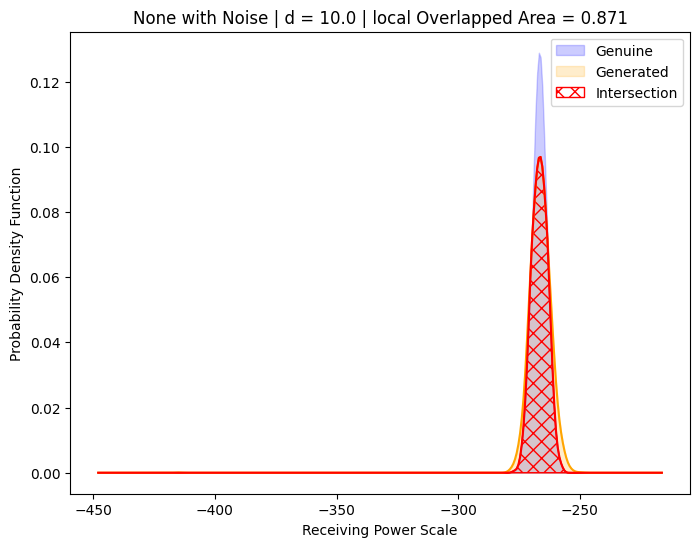

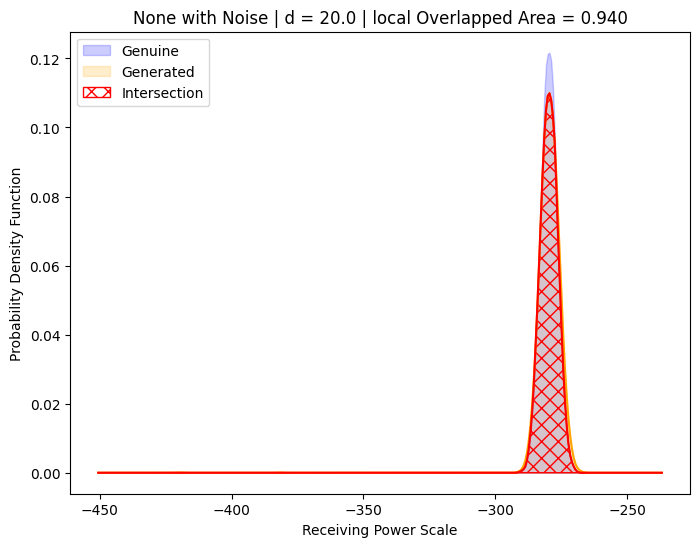

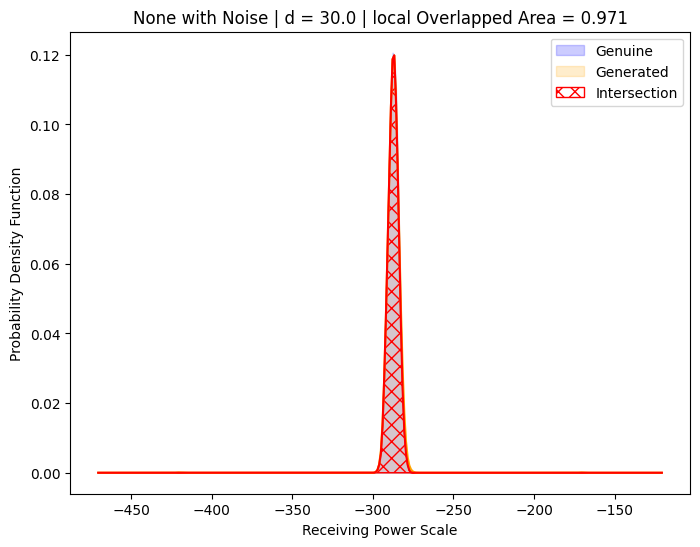

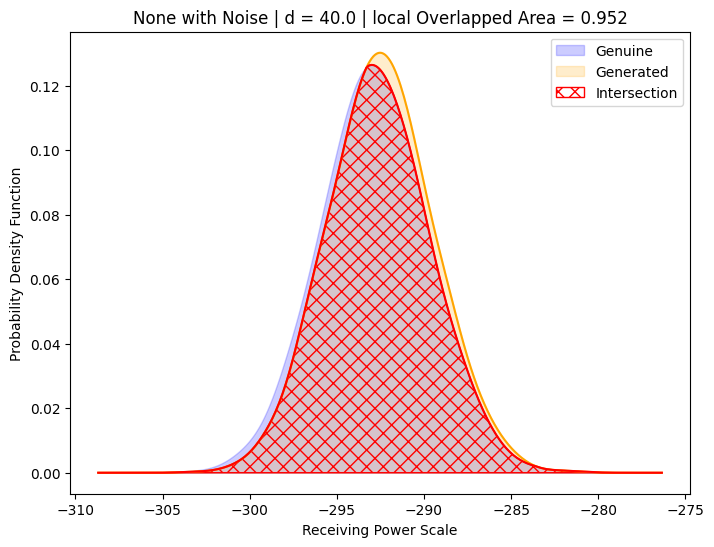

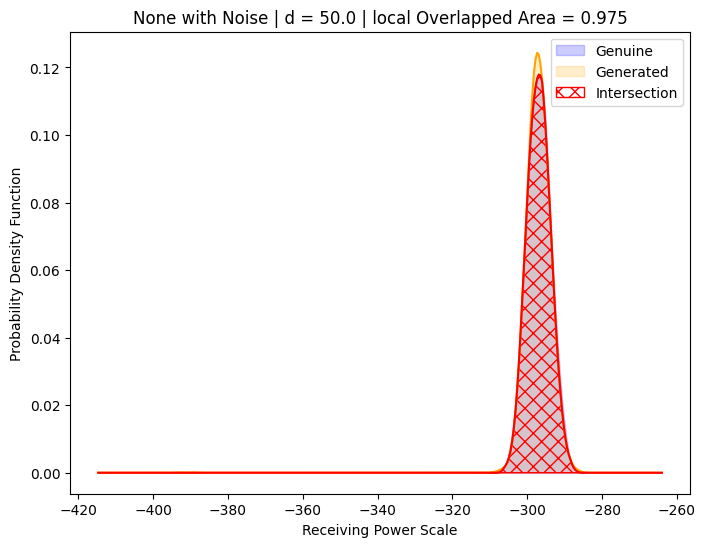

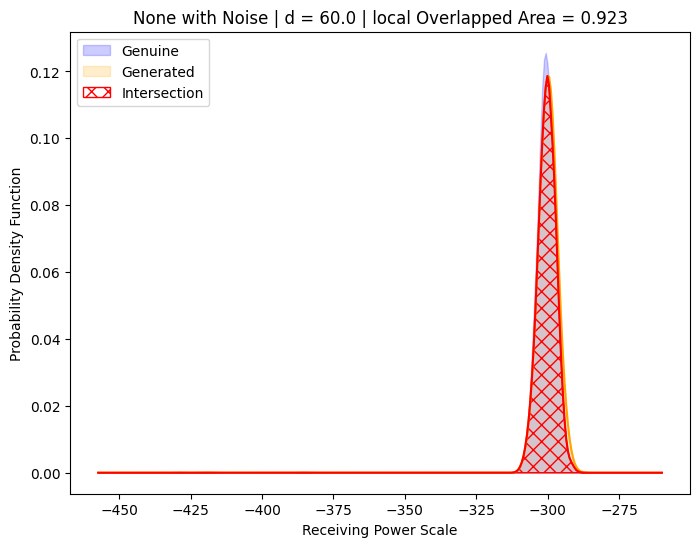

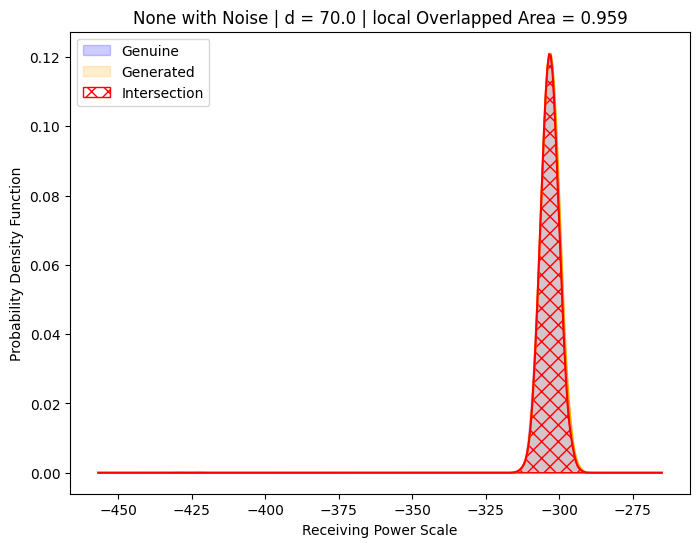

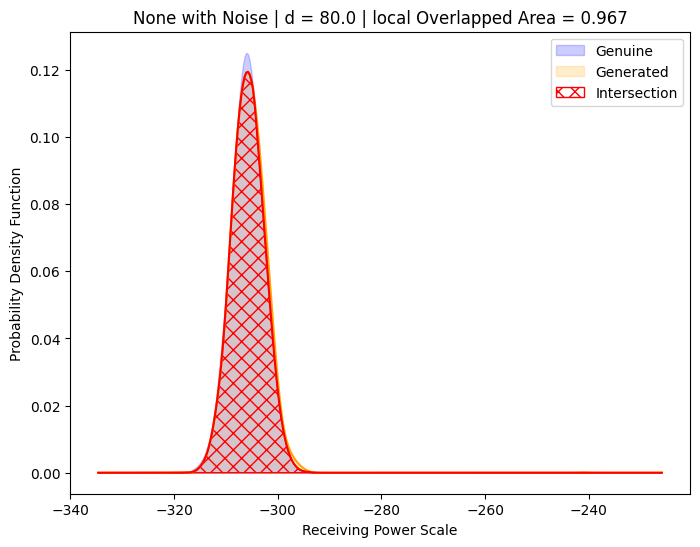

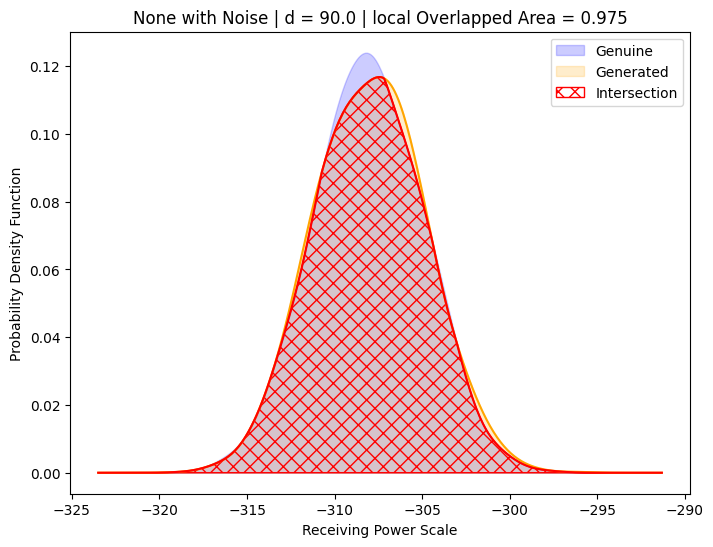

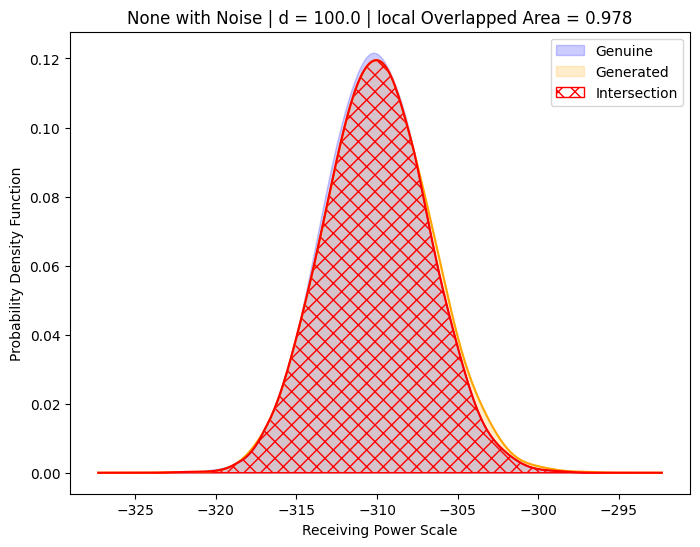

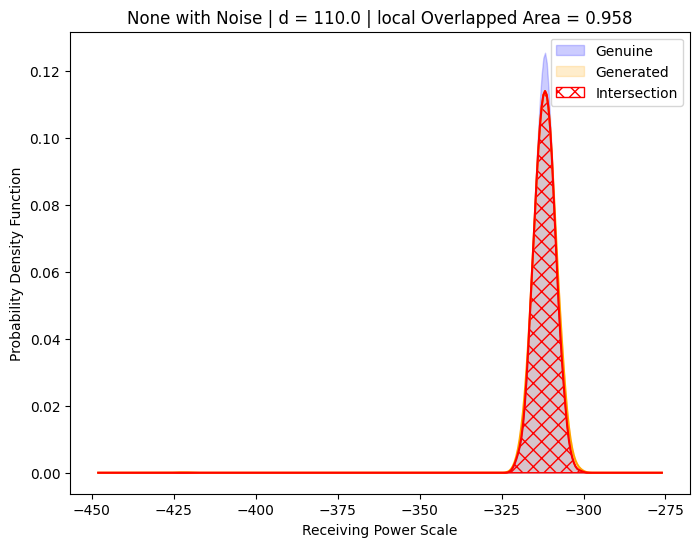

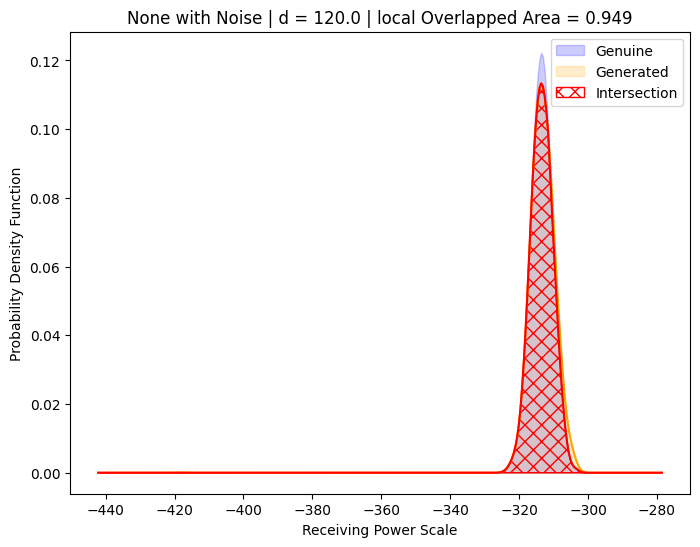

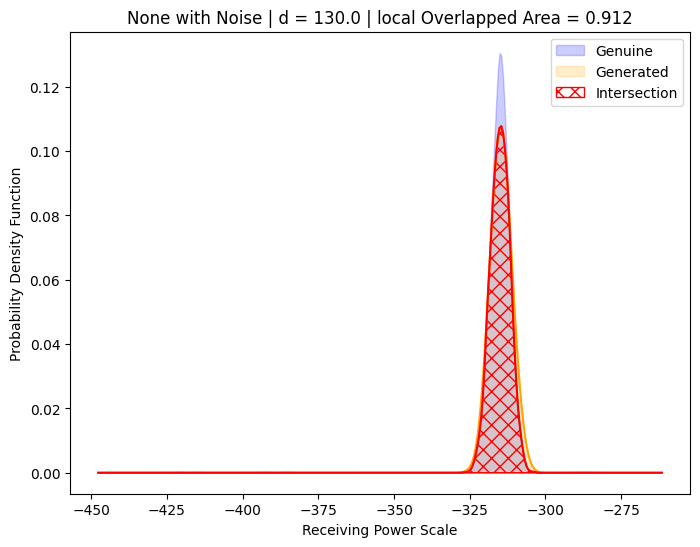

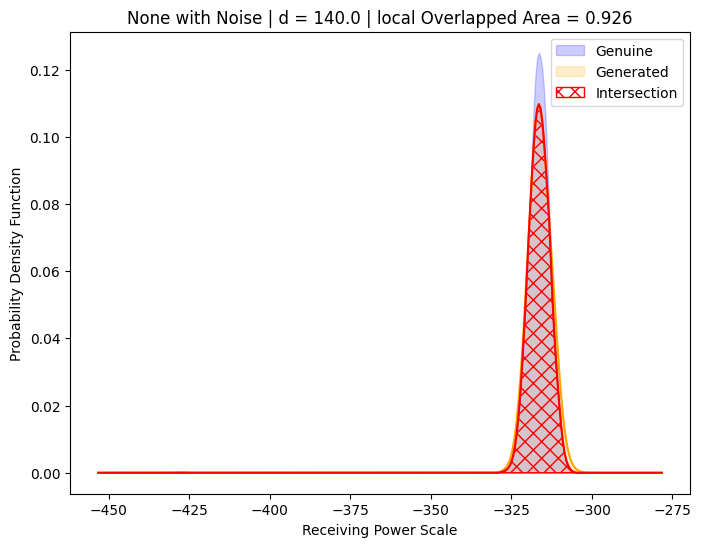

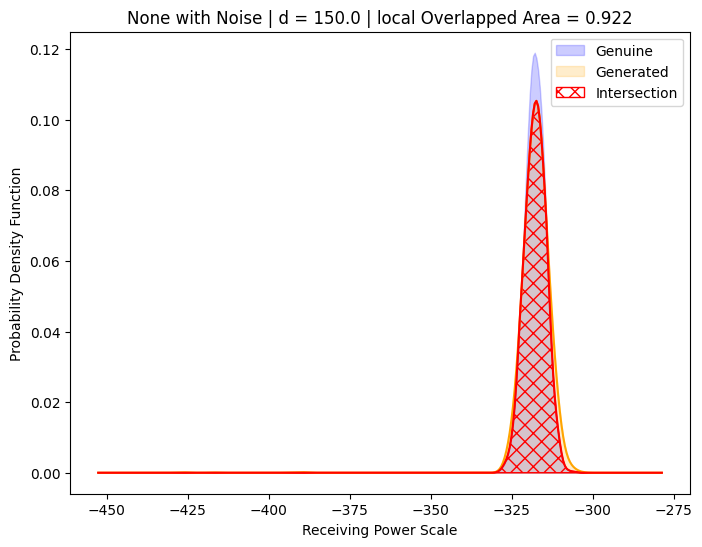

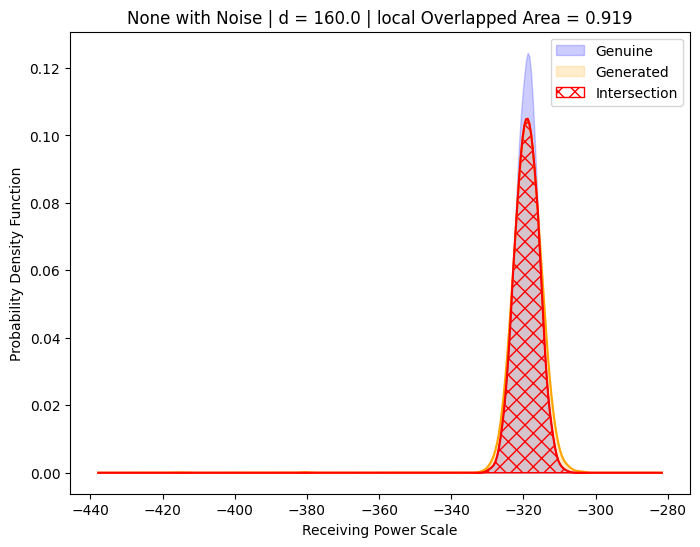

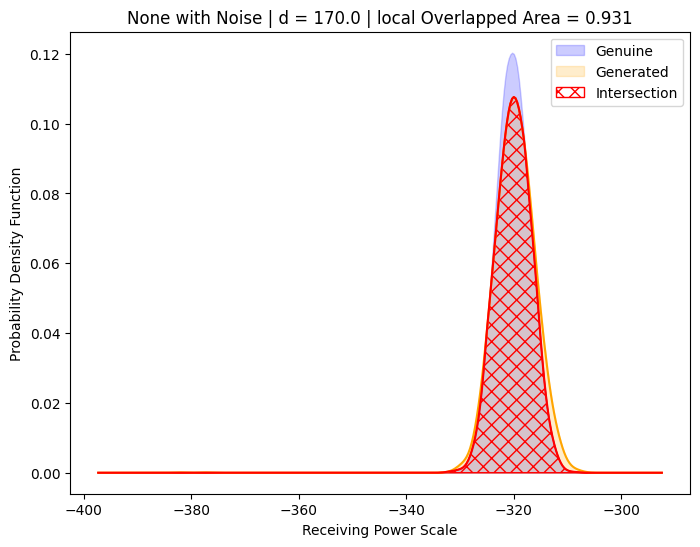

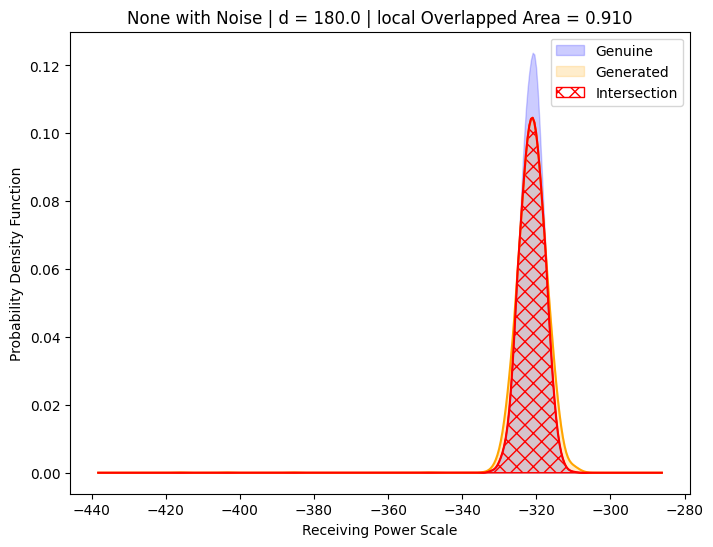

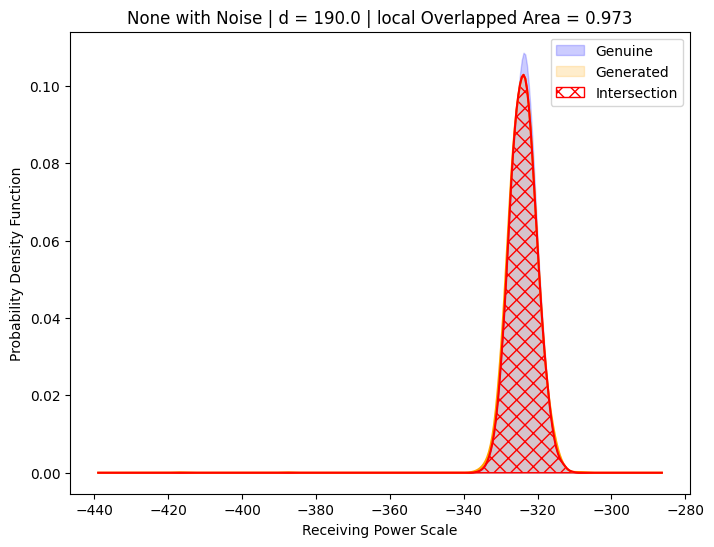

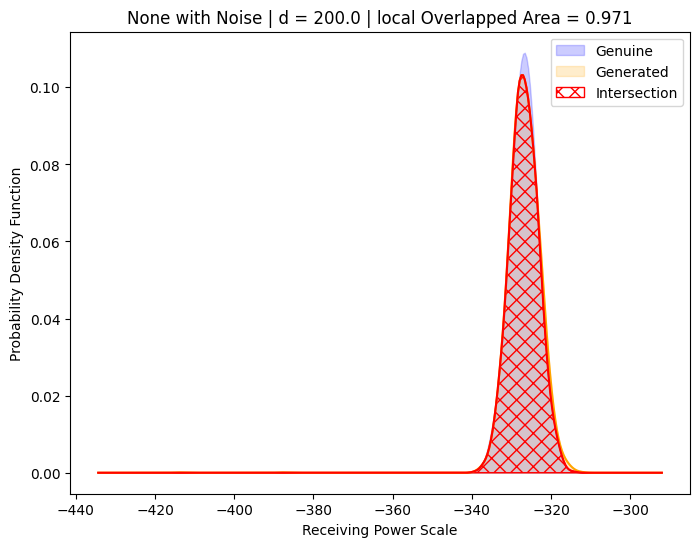

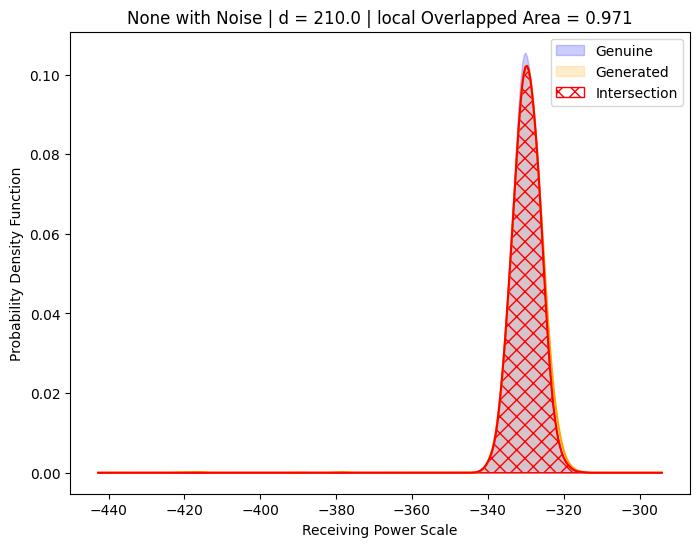

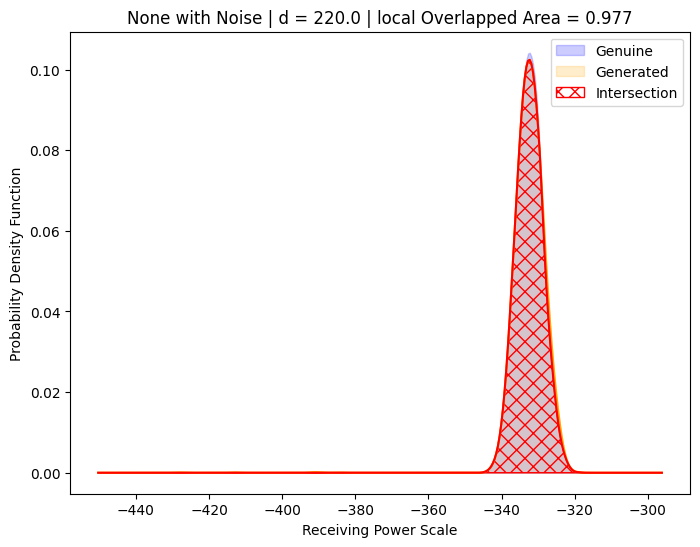

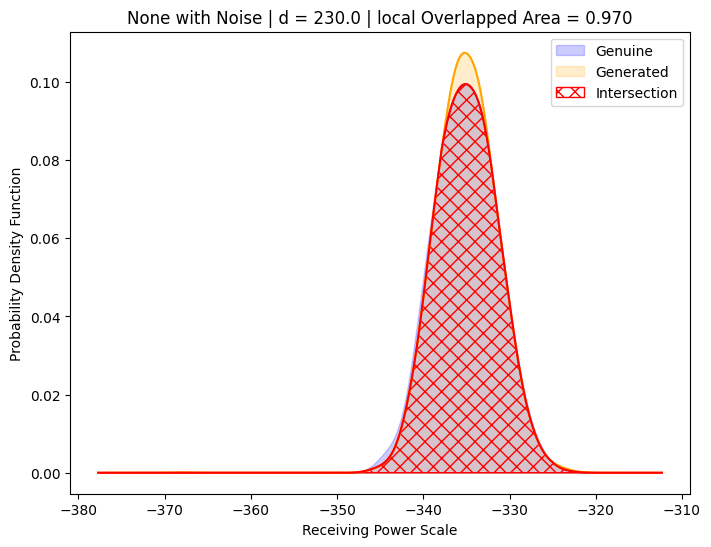

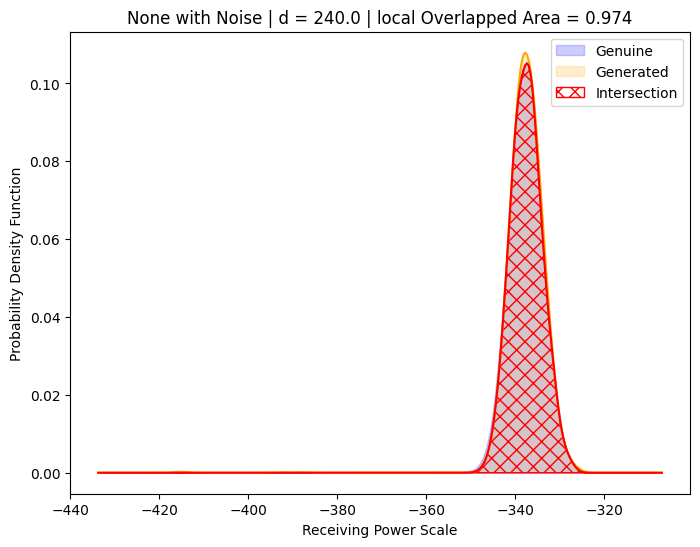

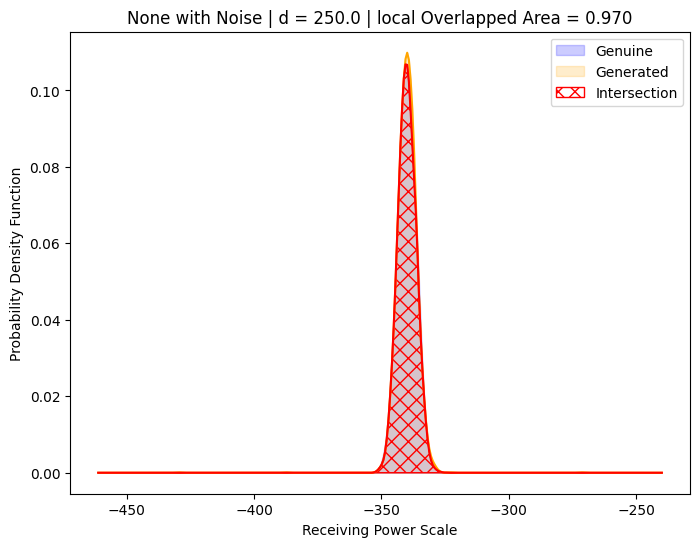

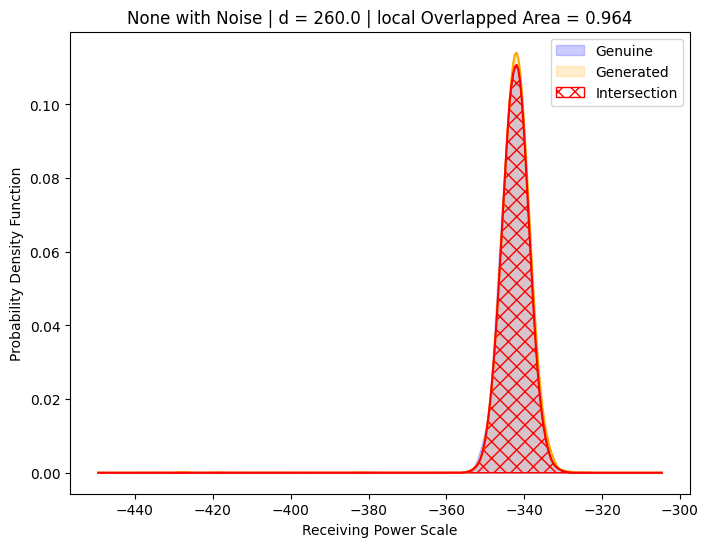

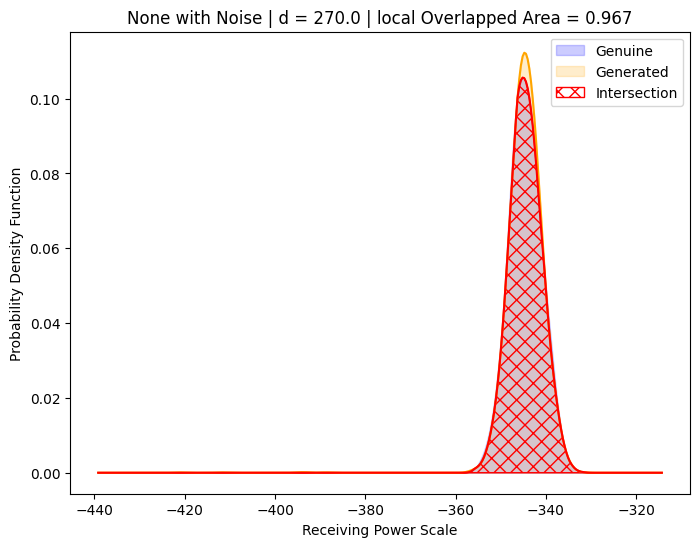

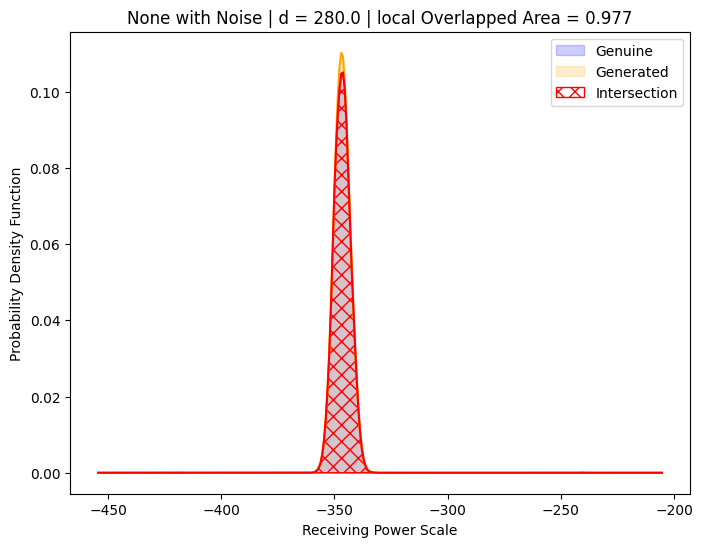

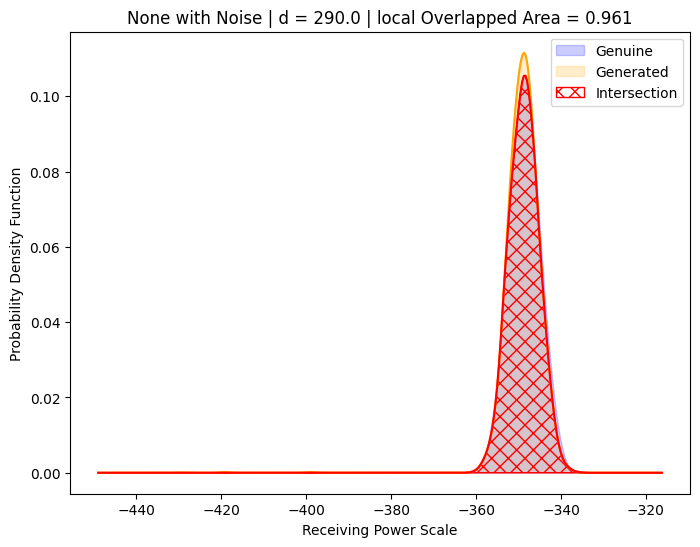

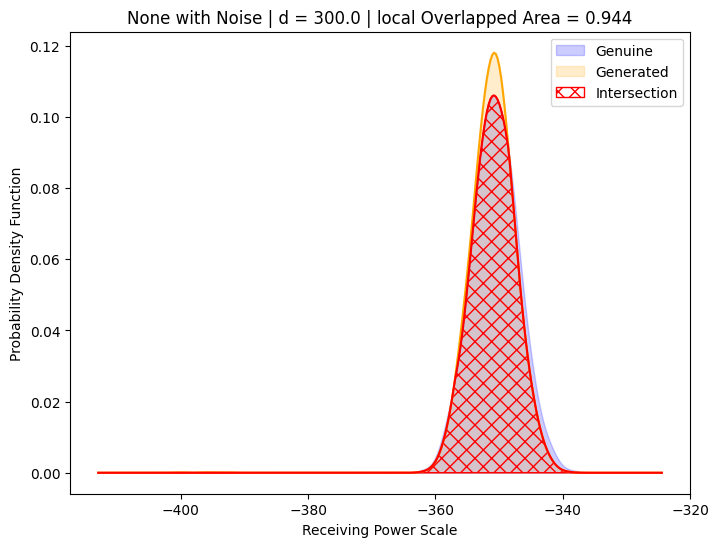

In [42]:
df_ln2_f_oa_best = evaluations.evaluation_OA(
    df_to_evaluate=df_ln2_f_test_back_scaled,
    name_model=None,
    dir_main_to_save=f"./evaluations",
    show_plot=True,
    to_save=False,
    # is_lognormal=True,
)

In [43]:
df_ln2_f_oa_best

d  area_overlapped
0    0.0         0.870593
1    1.0         0.940046
2    2.0         0.971170
3    3.0         0.951517
4    4.0         0.974610
5    5.0         0.923110
6    6.0         0.958591
7    7.0         0.967132
8    8.0         0.975309
9    9.0         0.977671
10  10.0         0.958234
11  11.0         0.949356
12  12.0         0.912204
13  13.0         0.926320
14  14.0         0.921700
15  15.0         0.918575
16  16.0         0.930611
17  17.0         0.910086
18  18.0         0.973500
19  19.0         0.971441
20  20.0         0.971046
21  21.0         0.976961
22  22.0         0.969819
23  23.0         0.973892
24  24.0         0.969665
25  25.0         0.964161
26  26.0         0.966666
27  27.0         0.977048
28  28.0         0.961403
29  29.0         0.944373